### This file contains analysis on red wine and white wine datasets SEPERATELY.
##### Prevent annoying warning messages from printing.

In [233]:
import warnings
warnings.filterwarnings('ignore')

### Data Preparation
First, we will import the red and white wine datasets from the UCI Machine Learning Repository. Throughout this code, the number 1 at the end of a variable will indicate that the variable is referencing the red wine dataset. Whereas the number 2 following a variable name will indicate that the variable is referencing the white wine dataset.

In [234]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading red wine dataset
dataset1 = pd.read_csv('winequality-red.csv')
print("RED WINE DATASET:")
print(dataset1.shape)
dataset1.head()

RED WINE DATASET:
(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [235]:
#Loading white wine dataset
dataset2 = pd.read_csv('winequality-white.csv')
print("WHITE WINE DATASET:")
print(dataset2.shape)
dataset2.head()

WHITE WINE DATASET:
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Now we will check for missing values in our datasets.
Do we have any missing values in our red wine dataset?

In [236]:
#Checking for missing values
dataset1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Do we have any missing values in our white wine dataset?

In [237]:
#Checking for missing values
dataset2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Next, we will select and remove any duplicate entries in our datasets.
Removing duplicate rows from the red wine dataset

In [238]:
#Selecting duplicate rows except first occurence based on all columns
duplicatedRowsDF = dataset1[dataset1.duplicated()]
print('Duplicate rows except first occurence based on all columns:')
print(duplicatedRowsDF)

Duplicate rows except first occurence based on all columns:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.1

In [239]:
#Removing duplicate entries from red wine dataset
dataset1 = dataset1.drop_duplicates().copy()

print('Size of red wine dataset after removing duplicate entries:', dataset1.shape)

Size of red wine dataset after removing duplicate entries: (1359, 12)


Removing duplicate rows from white wine dataset

In [240]:
#Selecting duplicate rows except first occurence based on all columns
duplicatedRowsDF = dataset2[dataset2.duplicated()]
print('Duplicate rows except first occurence based on all columns:')
print(duplicatedRowsDF)

Duplicate rows except first occurence based on all columns:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.4

In [241]:
#Removing duplicate entries from white wine dataset
dataset2 = dataset2.drop_duplicates().copy()

print('Size of white wine dataset after removing duplicate entries:', dataset2.shape)

Size of white wine dataset after removing duplicate entries: (3961, 12)


#### Finally, we will remove any rows that contain outlier data (values lying outside the threshold Z-score = 3).

In [242]:
#Function for removing outliers
def remove_outliers(df, sigma=3):
    
    for col in df.columns:
        column_data = df[col]
        mean = np.mean(column_data)
        std = np.std(column_data)
        
        outliers = []
        counter = 0
        
        for data in column_data:
            z_score = (data -mean)/std
            if np.abs(z_score) >= sigma:
                outliers.append(counter)
            counter += 1
            
        df.drop(df.index[outliers], inplace=True)

    df.reset_index(drop=True, inplace=True)
    return df

Removing rows containing outliers in red wine dataset

In [243]:
#Removing outliers in red wine dataset
dataset1 = dataset1.reset_index(drop=True)
dataset1 = remove_outliers(dataset1)
np.shape(dataset1)

(1208, 12)

Removing rows containing outliers in white wine dataset

In [244]:
#Removing outliers in white wine dataset
dataset2 = dataset2.reset_index(drop=True)
dataset2 = remove_outliers(dataset2)
np.shape(dataset2)

(3602, 12)

### Data Exploration

Let's look at the number of instances in each quality score ranking "bucket" for both datasets and then plot a histogram of 'quality' column for each dataset.

Number of Instances in Each Class - Red Wine Dataset:
8     15
4     46
7    152
6    488
5    507
Name: quality, dtype: int64

Number of Instances in Each Class - White Wine Dataset:
4     116
8     122
7     665
5    1045
6    1654
Name: quality, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D0717A100>]],
      dtype=object)

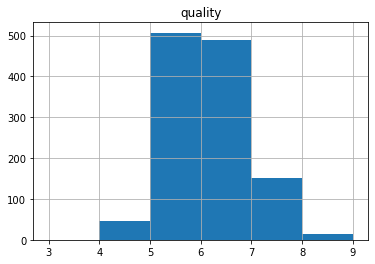

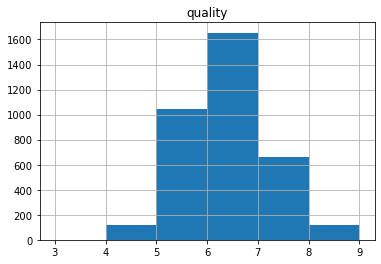

In [245]:
#Showing the number of instances in each class
print('Number of Instances in Each Class - Red Wine Dataset:')
print(dataset1['quality'].value_counts(ascending=True))
print()
print('Number of Instances in Each Class - White Wine Dataset:')
print(dataset2['quality'].value_counts(ascending=True))

#Plotting histogram of 'quality' column
dataset1.hist('quality', bins = (3,4,5,6,7,8,9))
dataset2.hist('quality', bins = (3,4,5,6,7,8,9))

Let's look at the basic statistcs of each dataset.

In [246]:
#Calculating statistics on red wine dataset
round(dataset1.describe(),3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000,1208.000
mean,8.292,0.524,0.264,2.374,0.082,14.984,42.946,0.997,3.315,0.640,10.437,5.655
std,1.648,0.172,0.191,0.820,0.022,9.169,28.035,0.002,0.141,0.126,1.039,0.793
min,5.000,0.120,0.000,1.200,0.038,1.000,6.000,0.992,2.880,0.330,8.500,4.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,21.000,0.996,3.220,0.550,9.500,5.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,35.500,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.089,21.000,58.000,0.998,3.400,0.710,11.100,6.000
max,13.500,1.070,0.790,6.550,0.230,45.000,135.000,1.002,3.750,1.100,13.600,8.000


In [247]:
#Calculating statistics on white wine dataset
round(dataset2.describe(),3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000,3602.000
mean,6.827,0.273,0.326,5.889,0.043,34.396,136.218,0.994,3.195,0.486,10.619,5.898
std,0.810,0.087,0.101,4.676,0.012,15.495,41.674,0.003,0.143,0.105,1.204,0.854
min,4.400,0.080,0.000,0.600,0.012,2.000,21.000,0.987,2.790,0.220,8.400,4.000
25%,6.300,0.210,0.270,1.600,0.035,23.000,106.000,0.992,3.100,0.410,9.600,5.000
50%,6.800,0.260,0.320,4.800,0.042,33.000,132.000,0.993,3.190,0.470,10.500,6.000
75%,7.300,0.320,0.380,8.800,0.049,45.000,165.000,0.996,3.290,0.550,11.400,6.000
max,9.400,0.585,0.690,19.950,0.108,86.000,260.000,1.002,3.640,0.820,14.200,8.000


In [248]:
#Calculating the mean quality score of red wines versus white wines
mean_quality = {'color': ['red', 'white'], 'mean quality': [dataset1["quality"].mean(), dataset2["quality"].mean()]}
mean_quality_df = pd.DataFrame(data = mean_quality)
mean_quality_df

,color,mean quality
0,red,5.654801
1,white,5.897835


{'whiskers': [<matplotlib.lines.Line2D at 0x25d05b6d580>,
 'caps': [<matplotlib.lines.Line2D at 0x25d05b6dc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d05b6d220>],
 'medians': [<matplotlib.lines.Line2D at 0x25d06fd6340>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d06fd6640>],
 'means': []}

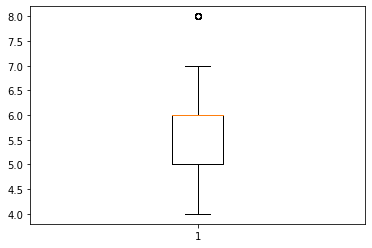

In [249]:
#Creating boxplot of quality data for red wine dataset
plt.boxplot(dataset1['quality'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25d0debd100>,
 'caps': [<matplotlib.lines.Line2D at 0x25d0debd7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d0dea8d60>],
 'medians': [<matplotlib.lines.Line2D at 0x25d0debde80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d05b1a190>],
 'means': []}

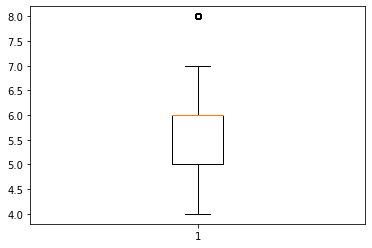

In [250]:
#Creating boxplot of quality data for white wine dataset
plt.boxplot(dataset2['quality'])

Now we will visualize the correlation between features in each of the seperate datasets.

Text(0.5, 1.0, 'Red Wine Feature Correlations')

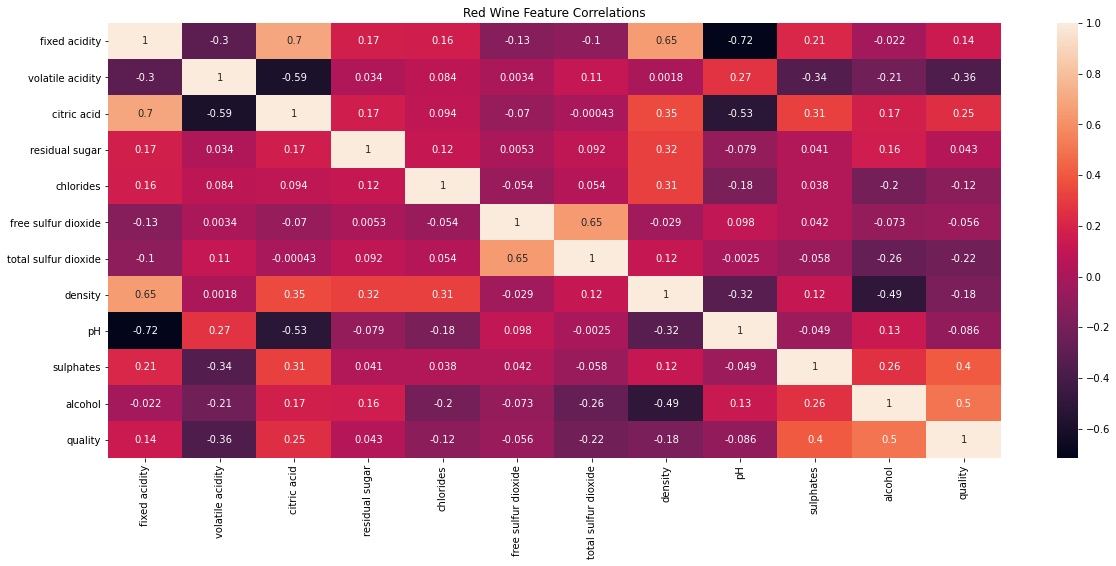

In [251]:
import seaborn as sns

#Creating heatmap of red wine correlations
plt.figure(figsize=(20,8))
sns.heatmap(dataset1.corr(),annot=True)
plt.title('Red Wine Feature Correlations')

Text(0.5, 1.0, 'White Wine Feature Correlations')

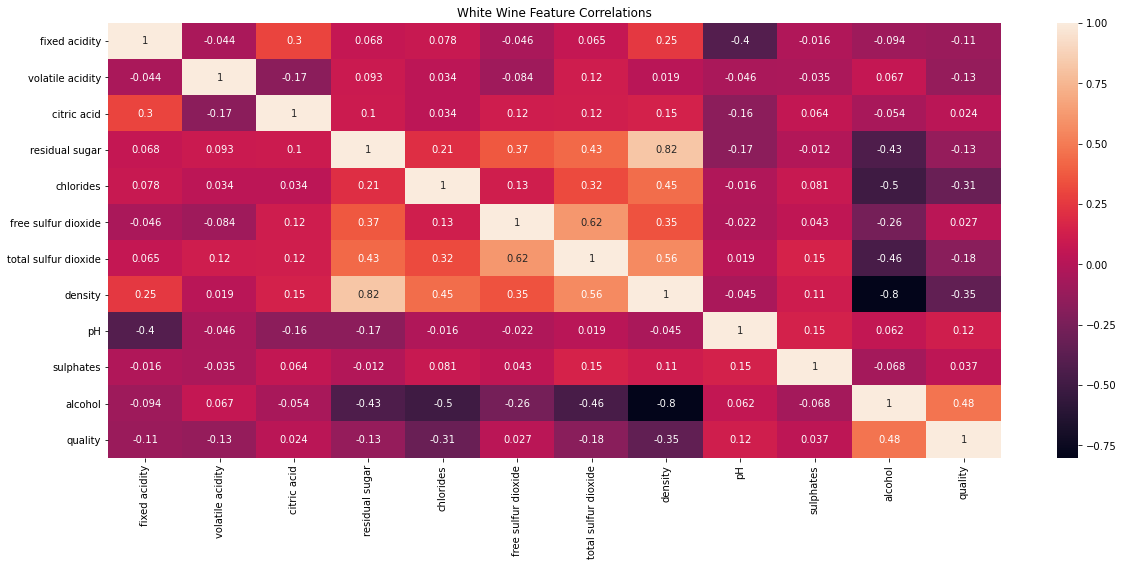

In [252]:
#Creating heatmap of white wine correlations
plt.figure(figsize=(20,8))
sns.heatmap(dataset2.corr(),annot=True)
plt.title('White Wine Feature Correlations')

### Model Training & Testing
#### Creating x & y arrays for each dataset

In [253]:
#Assigning x & y arrays for red wine dataset
x1 = dataset1.iloc[:,:-1].values
y1 = dataset1.iloc[:,11].values
print('x array:')
print(np.shape(x1))
print(x1)
print()
print('y array:')
print(np.shape(y1))
print(y1)
print()

x array:
(1208, 11)
[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]

y array:
(1208,)
[5 5 5 ... 6 5 6]



In [254]:
#Assigning x & y arrays for white wine dataset
x2 = dataset2.iloc[:,:-1].values
y2 = dataset2.iloc[:,11].values
print('x array:')
print(np.shape(x2))
print(x2)
print()
print('y array:')
print(np.shape(y2))
print(y2)
print()

x array:
(3602, 11)
[[ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 [ 7.2   0.23  0.32 ...  3.19  0.4   9.9 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]

y array:
(3602,)
[6 6 6 ... 6 7 6]



#### Train/Test split on each dataset
Red Wine Train/Test Split

In [255]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train1 = sc_x.fit_transform(x_train1)
x_test1 = sc_x.transform(x_test1)

print('Size of the x_train1 dataset:', np.shape(x_train1))
print('Size of the y_train1 dataset:', np.shape(y_train1))
print('Size of the x_test1 dataset:', np.shape(x_test1))
print('Size of the y_test1 dataset:', np.shape(y_test1))

Size of the x_train1 dataset: (845, 11)
Size of the y_train1 dataset: (845,)
Size of the x_test1 dataset: (363, 11)
Size of the y_test1 dataset: (363,)


White Wine Train/Test Split

In [256]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train2 = sc_x.fit_transform(x_train2)
x_test2 = sc_x.transform(x_test2)

print('Size of the x_train2 dataset:', np.shape(x_train2))
print('Size of the y_train2 dataset:', np.shape(y_train2))
print('Size of the x_test2 dataset:', np.shape(x_test2))
print('Size of the y_test2 dataset:', np.shape(y_test2))

Size of the x_train2 dataset: (2521, 11)
Size of the y_train2 dataset: (2521,)
Size of the x_test2 dataset: (1081, 11)
Size of the y_test2 dataset: (1081,)


#### Let's try tuning and fitting some models.

In [257]:
#Initializing dataframes to hold accuracy values
k_fold_cross_accuracies_red = pd.DataFrame({'Model': [],
                                            'Mean Model Accuracy': [],
                                            'Std. Deviation of Model Accuracies': []})
k_fold_cross_accuracies_white = pd.DataFrame({'Model': [],
                                            'Mean Model Accuracy': [],
                                            'Std. Deviation of Model Accuracies': []})

conclusion_red = pd.DataFrame({'Model': [],
                               'Accuracy': []})
conclusion_white = pd.DataFrame({'Model': [],
                                 'Accuracy': []})

#### Model 1: Logistic Regression Model
Red Wine Dataset Logistic Regression Model

In [258]:
#Red Wine Dataset

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression  
classifierLOR1 = LogisticRegression(random_state=0)  
classifierLOR1.fit(x_train1, y_train1)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierLOR1, X=x_train1, y=y_train1, cv=10)  
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'Logistic Regression',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierLOR1.score(x_test1,y_test1)
print('Testing Accuracy Rate for Logistic Regression:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Logistic Regression:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_red = conclusion_red.append({'Model':'Logistic Regression', 
                                        'Accuracy':np.round_(accuracy,4)}, 
                                        ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5728
Standard Deviation of Model Accuracies: 0.0312

Testing Accuracy Rate for Logistic Regression: 0.6364
Testing Misclassification Rate for Logistic Regression: 0.3636


White Wine Dataset Logistic Regression Model

In [259]:
#White Wine Dataset

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression  
classifierLOR2 = LogisticRegression(random_state=0)  
classifierLOR2.fit(x_train2, y_train2)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierLOR2, X=x_train2, y=y_train2, cv=10)  
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'Logistic Regression',
                                                                      'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                      'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                      ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierLOR2.score(x_test2,y_test2)
print('Testing Accuracy Rate for Logistic Regression:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Logistic Regression:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_white = conclusion_white.append({'Model':'Logistic Regression', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.5407
Standard Deviation of Model Accuracies: 0.0222

Testing Accuracy Rate for Logistic Regression: 0.5199
Testing Misclassification Rate for Logistic Regression: 0.4801


#### Model 2: k-NN Model

Red Wine Dataset k-NN Model

RED WINE DATASET:
Minimum Testing Misclassification Rate: 0.3554
Corresponding k-value: 41



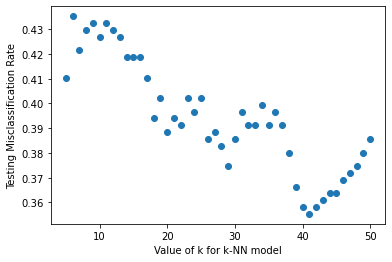

In [260]:
#Red Wine Dataset
#k-NN Model

#List of integers to try as k-values
n_neighbors = range(5,51)

#Initializing list to store misclassification rates
misclass_rate_test = []

#Looping through k-values
for i in n_neighbors:
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.neighbors import KNeighborsClassifier
    classifierkNN1 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    classifierkNN1.fit(x_train1, y_train1)
    
    #Calculating Test Model Misclassification Rate
    accuracy = classifierkNN1.score(x_test1,y_test1)
    misclass_rate = 1-accuracy
    misclass_rate_test.append(misclass_rate)

#Plotting k-value vs. Test Model Misclassification Rate
from matplotlib.colors import ListedColormap
plt.scatter(n_neighbors, misclass_rate_test)
plt.xlabel('Value of k for k-NN model')
plt.ylabel('Testing Misclassification Rate')

#Printing Minimum Testing Misclassification Rate & corresponding k-value
misclass_rate_min = min(misclass_rate_test)
k_min = n_neighbors[0] + misclass_rate_test.index(misclass_rate_min)
print('RED WINE DATASET:')
print('Minimum Testing Misclassification Rate:', np.round(misclass_rate_min,4))
print('Corresponding k-value:', k_min)
print()

In [261]:
# #Red Wine Dataset

# #k-NN Model
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.neighbors import KNeighborsClassifier
# classifierkNN1 = KNeighborsClassifier()

# grid_param = {
# 'n_neighbors': list(range(5,51)),
# 'weights': ['uniform', 'distance'],
# 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# 'p': [1, 2],
# 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'seuclidean', 'mahalanobis']
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierkNN1, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train1, y_train1)
# print('RED WINE DATASET:')
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [262]:
#Red Wine Dataset
#k-NN Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
classifierkNN1 = KNeighborsClassifier(n_neighbors=23, weights='distance', 
                                      algorithm='brute', p=1, metric='chebyshev')
classifierkNN1.fit(x_train1, y_train1)
    
#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierkNN1, X=x_train1, y=y_train1, cv=10)  
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'k-NN',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierkNN1.score(x_test1,y_test1)
print('Testing Accuracy Rate for k-NN:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for k-NN:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_red = conclusion_red.append({'Model':'k-NN', 
                                        'Accuracy':np.round_(accuracy,4)},
                                        ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.587
Standard Deviation of Model Accuracies: 0.0254

Testing Accuracy Rate for k-NN: 0.5895
Testing Misclassification Rate for k-NN: 0.4105


White Wine Dataset k-NN Model

WHITE WINE DATASET:
Minimum Testing Misclassification Rate: 0.4496
Corresponding k-value: 47



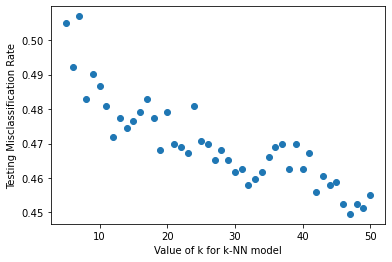

In [263]:
#White Wine Dataset
#k-NN Model

#List of integers to try as k-values
n_neighbors = range(5,51)

#Initializing list to store misclassification rates
misclass_rate_test = []

#Looping through k-values
for i in n_neighbors:
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.neighbors import KNeighborsClassifier
    classifierkNN2 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    classifierkNN2.fit(x_train2, y_train2)
    
    #Calculating Test Model Misclassification Rate
    accuracy = classifierkNN2.score(x_test2,y_test2)
    misclass_rate = 1-accuracy
    misclass_rate_test.append(misclass_rate)

#Plotting k-value vs. Test Model Misclassification Rate
from matplotlib.colors import ListedColormap
plt.scatter(n_neighbors, misclass_rate_test)
plt.xlabel('Value of k for k-NN model')
plt.ylabel('Testing Misclassification Rate')

#Printing Minimum Testing Misclassification Rate & corresponding k-value
misclass_rate_min = min(misclass_rate_test)
k_min = n_neighbors[0] + misclass_rate_test.index(misclass_rate_min)
print('WHITE WINE DATASET:')
print('Minimum Testing Misclassification Rate:', np.round(misclass_rate_min,4))
print('Corresponding k-value:', k_min)
print()

In [264]:
# #White Wine Dataset

# #k-NN Model
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.neighbors import KNeighborsClassifier
# classifierkNN2 = KNeighborsClassifier()

# grid_param = {
# 'n_neighbors': list(range(5,51)),
# 'weights': ['uniform', 'distance'],
# 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# 'p': [1, 2],
# 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'seuclidean', 'mahalanobis']
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierkNN2, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train2, y_train2)
# print('WHITE WINE DATASET:')
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [265]:
#White Wine Dataset
#k-NN Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
classifierkNN2 = KNeighborsClassifier(n_neighbors=30, weights='distance', 
                                      algorithm='auto', p=1, metric='minkowski')
classifierkNN2.fit(x_train2, y_train2)
    
#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierkNN1, X=x_train2, y=y_train2, cv=10)  
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'k-NN',
                                                                      'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                      'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                      ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierkNN2.score(x_test2,y_test2)
print('Testing Accuracy Rate for k-NN:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for k-NN:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_white = conclusion_white.append({'Model':'k-NN', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.5486
Standard Deviation of Model Accuracies: 0.0222

Testing Accuracy Rate for k-NN: 0.5467
Testing Misclassification Rate for k-NN: 0.4533


#### Model 3: SVM Model

Red Wine Dataset SVM Model

In [266]:
#Red Wine Dataset
#SVM model

#List of integers to try as poly degrees
degrees = range(2,21)

#Initializing list to store misclassification rates
misclass_rate_test = []
print('RED WINE DATASET:')

#Looping through polynomial model number of degrees
kernel_type = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel_type:
    if i == 'poly':
        for j in degrees:
            #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
            from sklearn.svm import SVC  
            classifierSVC1 = SVC(kernel=i, degree=j)  
            classifierSVC1.fit(x_train1, y_train1)
        
            #Calculating Test Model Misclassification Rate
            accuracy = classifierSVC1.score(x_test1,y_test1)
            misclass_rate = 1-accuracy
            misclass_rate_test.append(misclass_rate)
        
        #Printing Minimum Poly Model Misclassification Rate & corresponding degree value
        misclass_rate_min = min(misclass_rate_test)
        degree_min = degrees[0] + misclass_rate_test.index(misclass_rate_min)
        print('Minimum Testing Misclassification Rate for',i,'kernel was found using \n',degree_min,'degrees:', np.round_(misclass_rate_min,4))
        print()
        
    else:
        #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
        from sklearn.svm import SVC  
        classifierSVC1 = SVC(kernel=i)  
        classifierSVC1.fit(x_train1, y_train1)
        
        #Printing Model Misclassification Rate
        accuracy = classifierSVC1.score(x_test1,y_test1)
        misclass_rate = 1-accuracy
        print('Testing Misclassification Rate for',i,'kernel:', np.round(misclass_rate,4))
        print()        

RED WINE DATASET:
Testing Misclassification Rate for linear kernel: 0.3884

Testing Misclassification Rate for rbf kernel: 0.3554

Minimum Testing Misclassification Rate for poly kernel was found using 
 3 degrees: 0.3912

Testing Misclassification Rate for sigmoid kernel: 0.4683



In [267]:
#Red Wine Dataset
#SVM Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC  
classifierSVC1 = SVC(kernel='rbf')  
classifierSVC1.fit(x_train1, y_train1)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierSVC1, X=x_train1, y=y_train1, cv=10)
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'SVM',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierSVC1.score(x_test1,y_test1)
print('Testing Accuracy Rate for SVM:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for SVM:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_red = conclusion_red.append({'Model':'SVM', 
                                        'Accuracy':np.round_(accuracy,4)}, 
                                        ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5751
Standard Deviation of Model Accuracies: 0.037

Testing Accuracy Rate for SVM: 0.6446
Testing Misclassification Rate for SVM: 0.3554


White Wine Dataset SVM Model

In [268]:
#White Wine Dataset
#SVM model

#List of integers to try as poly degrees
degrees = range(2,21)

#Initializing list to store misclassification rates
misclass_rate_test = []
print('WHITE WINE DATASET:')

#Looping through polynomial model number of degrees
kernel_type = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel_type:
    if i == 'poly':
        for j in degrees:
            #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
            from sklearn.svm import SVC  
            classifierSVC2 = SVC(kernel=i, degree=j)  
            classifierSVC2.fit(x_train2, y_train2)
        
            #Calculating Test Model Misclassification Rate
            accuracy = classifierSVC2.score(x_test2,y_test2)
            misclass_rate = 1-accuracy
            misclass_rate_test.append(misclass_rate)
        
        #Printing Minimum Poly Model Misclassification Rate & corresponding degree value
        misclass_rate_min = min(misclass_rate_test)
        degree_min = degrees[0] + misclass_rate_test.index(misclass_rate_min)
        print('Minimum Testing Misclassification Rate for',i,'kernel was found using \n',degree_min,'degrees:', np.round_(misclass_rate_min,4))
        print()
        
    else:
        #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
        from sklearn.svm import SVC  
        classifierSVC2 = SVC(kernel=i)  
        classifierSVC2.fit(x_train2, y_train2)
        
        #Printing Model Misclassification Rate
        accuracy = classifierSVC2.score(x_test2,y_test2)
        misclass_rate = 1-accuracy
        print('Testing Misclassification Rate for',i,'kernel:', np.round(misclass_rate,4))
        print()        

WHITE WINE DATASET:
Testing Misclassification Rate for linear kernel: 0.4857

Testing Misclassification Rate for rbf kernel: 0.4514

Minimum Testing Misclassification Rate for poly kernel was found using 
 3 degrees: 0.4783

Testing Misclassification Rate for sigmoid kernel: 0.5745



In [269]:
#White Wine Dataset
#SVM Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC  
classifierSVC2 = SVC(kernel='rbf')  
classifierSVC2.fit(x_train2, y_train2)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierSVC2, X=x_train2, y=y_train2, cv=10)  
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'SVM',
                                                                      'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                      'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                      ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierSVC2.score(x_test2,y_test2)
print('Testing Accuracy Rate for SVM:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for SVM:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_white = conclusion_white.append({'Model':'SVM', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.5605
Standard Deviation of Model Accuracies: 0.034

Testing Accuracy Rate for SVM: 0.5486
Testing Misclassification Rate for SVM: 0.4514


#### Model 4: Naive Bayes Model

Red Wine Dataset Naive Bayes Model

In [270]:
#Red Wine Dataset
#Naive Bayes Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj  
from sklearn.naive_bayes import GaussianNB
classifierNB1 = GaussianNB()  
classifierNB1.fit(x_train1, y_train1)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierNB1, X=x_train1, y=y_train1, cv=10)  
print('RED WINE DATASET')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'Naive Bayes',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierNB1.score(x_test1,y_test1)
print('Testing Accuracy Rate for Naive Bayes:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Naive Bayes:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_red = conclusion_red.append({'Model':'Naive Bayes', 
                                        'Accuracy':np.round_(accuracy,4)}, 
                                        ignore_index=True)

RED WINE DATASET
Mean Model Accuracy: 0.5396
Standard Deviation of Model Accuracies: 0.0435

Testing Accuracy Rate for Naive Bayes: 0.5702
Testing Misclassification Rate for Naive Bayes: 0.4298


White Wine Dataset Naive Bayes Model

In [271]:
#White Wine Dataset
#Naive Bayes Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj  
from sklearn.naive_bayes import GaussianNB
classifierNB2 = GaussianNB()  
classifierNB2.fit(x_train2, y_train2)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierNB2, X=x_train2, y=y_train2, cv=10)  
print('WHITE WINE DATASET')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'Naive Bayes',
                                                                      'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                      'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                      ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierNB2.score(x_test2,y_test2)
print('Testing Accuracy Rate for Naive Bayes:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Naive Bayes:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_white = conclusion_white.append({'Model':'Naive Bayes', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

WHITE WINE DATASET
Mean Model Accuracy: 0.4772
Standard Deviation of Model Accuracies: 0.018

Testing Accuracy Rate for Naive Bayes: 0.4662
Testing Misclassification Rate for Naive Bayes: 0.5338


#### Model 5: Random Forest Model

Red Wine Dataset Random Forest Model

RED WINE DATASET:
Minimum Testing Misclassification Rate: 0.3444
Corresponding number of trees: 131


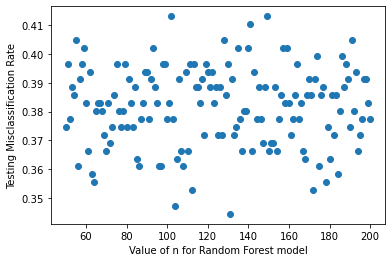

In [272]:
#Red Wine Dataset
#Random Forest Model

#List of integers to try as n
n_estimators = range(50,201)

#Initializing list to store misclassification rates
misclass_rate_test = []

#Looping through n
for i in n_estimators:
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.ensemble import RandomForestClassifier
    classifierRF1 = RandomForestClassifier(n_estimators=50, criterion='entropy')
    classifierRF1.fit(x_train1,y_train1)
    
    #Calculating Test Model Misclassification Rate
    accuracy = classifierRF1.score(x_test1,y_test1)
    misclass_rate = 1-accuracy
    misclass_rate_test.append(misclass_rate)

#Plotting k-value vs. Test Model Misclassification Rate
plt.scatter(n_estimators, misclass_rate_test)
plt.xlabel('Value of n for Random Forest model')
plt.ylabel('Testing Misclassification Rate')

#Printing Minimum Testing Misclassification Rate & corresponding k-value
misclass_rate_min = min(misclass_rate_test)
n_min = n_estimators[0] + misclass_rate_test.index(misclass_rate_min)
print('RED WINE DATASET:')
print('Minimum Testing Misclassification Rate:', np.round_(misclass_rate_min,4))
print('Corresponding number of trees:', n_min)

In [273]:
# #Red Wine Dataset

# #Random Forest Model
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import RandomForestClassifier
# classifierRF1 = RandomForestClassifier(random_state=0)

# grid_param = {
# 'n_estimators': list(range(50,201)),
# 'criterion': ['gini', 'entropy'],
# 'bootstrap': [True, False]
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierRF1, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train1, y_train1)
# print('RED WINE DATASET:')
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [274]:
#Red Wine Dataset
#Random Forest Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierRF1 = RandomForestClassifier(n_estimators=177, criterion='entropy', bootstrap=True, random_state=0)
classifierRF1.fit(x_train1,y_train1)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierRF1, X=x_train1, y=y_train1, cv=10) 
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'Random Forest',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierRF1.score(x_test1,y_test1)
print('Testing Accuracy Rate for Random Forest:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Random Forest:', np.round_(misclass_rate,4))

conclusion_red = conclusion_red.append({'Model':'Random Forest', 
                                        'Accuracy':np.round_(accuracy,4)}, 
                                        ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5835
Standard Deviation of Model Accuracies: 0.0473

Testing Accuracy Rate for Random Forest: 0.6143
Testing Misclassification Rate for Random Forest: 0.3857


White Wine Dataset Random Forest Model

WHITE WINE DATASET:
Minimum Testing Misclassification Rate: 0.4487
Corresponding number of trees: 80


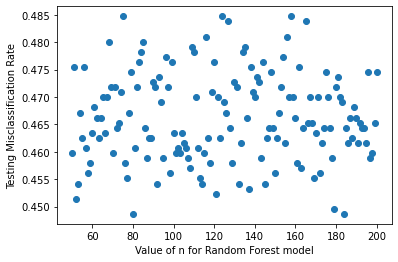

In [275]:
#White Wine Dataset
#Random Forest Model

#List of integers to try as n
n_estimators = range(50,201)

#Initializing list to store misclassification rates
misclass_rate_test = []

#Looping through n
for i in n_estimators:
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.ensemble import RandomForestClassifier
    classifierRF2 = RandomForestClassifier(n_estimators=50, criterion='entropy')
    classifierRF2.fit(x_train2,y_train2)
    
    #Calculating Test Model Misclassification Rate
    accuracy = classifierRF2.score(x_test2,y_test2)
    misclass_rate = 1-accuracy
    misclass_rate_test.append(misclass_rate)

#Plotting k-value vs. Test Model Misclassification Rate
plt.scatter(n_estimators, misclass_rate_test)
plt.xlabel('Value of n for Random Forest model')
plt.ylabel('Testing Misclassification Rate')

#Printing Minimum Testing Misclassification Rate & corresponding k-value
misclass_rate_min = min(misclass_rate_test)
n_min = n_estimators[0] + misclass_rate_test.index(misclass_rate_min)
print('WHITE WINE DATASET:')
print('Minimum Testing Misclassification Rate:', np.round_(misclass_rate_min,4))
print('Corresponding number of trees:', n_min)

In [276]:
# #White Wine Dataset

# #Random Forest Model
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import RandomForestClassifier
# classifierRF2 = RandomForestClassifier(random_state=0)

# grid_param = {
# 'n_estimators': list(range(50,201)),
# 'criterion': ['gini', 'entropy'],
# 'bootstrap': [True, False]
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierRF2, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train2, y_train2)
# print('WHITE WINE DATASET:')
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [277]:
#White Wine Dataset
#Random Forest Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierRF2 = RandomForestClassifier(n_estimators=101, criterion='entropy', bootstrap=True, random_state=0)
classifierRF2.fit(x_train2,y_train2)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierRF2, X=x_train2, y=y_train2, cv=10)
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'Random Forest',
                                                                     'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                     'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                     ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierRF2.score(x_test2,y_test2)
print('Testing Accuracy Rate for Random Forest:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Random Forest:', np.round_(misclass_rate,4))

conclusion_white = conclusion_white.append({'Model':'Random Forest', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.5767
Standard Deviation of Model Accuracies: 0.0412

Testing Accuracy Rate for Random Forest: 0.5449
Testing Misclassification Rate for Random Forest: 0.4551


#### Model 6: Ensemble Model

Red Wine Dataset Ensemble Model

In [278]:
#Red Wine Dataset
#Ensemble Method
from scipy import stats
from sklearn.metrics import confusion_matrix

y_pred_en=[]
for i in x_test1:
    Cl1= classifierLOR1.predict([i])
    Cl2= classifierkNN1.predict([i])
    Cl3= classifierSVC1.predict([i])
    Cl4= classifierNB1.predict([i])
    Cl5= classifierRF1.predict([i])
    
    a=stats.mode([Cl1,Cl2,Cl3,Cl4,Cl5])
   
    y_pred_en.append(a[0][0][0])
   
y_pred_en=np.array(y_pred_en)

cm_en=confusion_matrix(y_test1, y_pred_en)
print('RED WINE DATASET:')
print("Confusion Matrix = ","\n" ,cm_en, "\n")
Misc_en=(sum(sum(cm_en))-np.trace(cm_en))/sum(sum(cm_en))
accuracy_en= (round((1-Misc_en),4)) 

#Printing Testing Misclassification Rate
print('Testing Accuracy Rate for Ensemble Model:', accuracy_en)
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Ensemble Model:', (round(Misc_en,4)))

conclusion_red = conclusion_red.append({'Model':'Ensemble', 
                                        'Accuracy':accuracy_en}, 
                                        ignore_index=True)

RED WINE DATASET:
Confusion Matrix =  
 [[  0   6   2   0   0]
 [  1 124  47   4   0]
 [  0  32  95  11   0]
 [  0   3  23  14   0]
 [  0   0   1   0   0]] 

Testing Accuracy Rate for Ensemble Model: 0.6419
Testing Misclassification Rate for Ensemble Model: 0.3581


White Wine Dataset Ensemble Model

In [279]:
#White Wine Dataset
#Ensemble Method
from scipy import stats
from sklearn.metrics import confusion_matrix

y_pred_en=[]
for i in x_test2:
    Cl1= classifierLOR2.predict([i])
    Cl2= classifierkNN2.predict([i])
    Cl3= classifierSVC2.predict([i])
    Cl4= classifierNB2.predict([i])
    Cl5= classifierRF2.predict([i])
    
    a=stats.mode([Cl1,Cl2,Cl3,Cl4,Cl5])
   
    y_pred_en.append(a[0][0][0])
   
y_pred_en=np.array(y_pred_en)

cm_en=confusion_matrix(y_test2, y_pred_en)
print('WHITE WINE DATASET:')
print("Confusion Matrix = ","\n" ,cm_en, "\n")
Misc_en=(sum(sum(cm_en))-np.trace(cm_en))/sum(sum(cm_en))
accuracy_en= (round((1-Misc_en),4)) 

#Printing Testing Misclassification Rate
print('Testing Accuracy Rate for Ensemble Model:', accuracy_en)
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Ensemble Model:', (round(Misc_en,4)))

conclusion_white = conclusion_white.append({'Model':'Ensemble', 
                                            'Accuracy':accuracy_en}, 
                                            ignore_index=True)

WHITE WINE DATASET:
Confusion Matrix =  
 [[  1  22  18   1   0]
 [  0 180 131   0   0]
 [  0 100 346  36   0]
 [  0   6 140  61   0]
 [  0   1  27  11   0]] 

Testing Accuracy Rate for Ensemble Model: 0.5439
Testing Misclassification Rate for Ensemble Model: 0.4561


In [280]:
conclusion_red

,Model,Accuracy
0,Logistic Regression,0.6364
1,k-NN,0.5895
2,SVM,0.6446
3,Naive Bayes,0.5702
4,Random Forest,0.6143
5,Ensemble,0.6419


In [281]:
conclusion_white

,Model,Accuracy
0,Logistic Regression,0.5199
1,k-NN,0.5467
2,SVM,0.5486
3,Naive Bayes,0.4662
4,Random Forest,0.5449
5,Ensemble,0.5439


#### Let's try training some classifier models that are better at dealing with datasets that have outliers.
#### Extra Trees Classifier

Red Wine Dataset Extra Trees Classifier

In [282]:
# #Red Wine Dataset

# #Extra Trees Classifier Model
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import ExtraTreesClassifier
# classifierET = ExtraTreesClassifier(random_state=0)

# grid_param = {
# 'n_estimators': list(range(50,201)),
# 'criterion': ['gini', 'entropy'],
# 'max_features': ['auto', 'sqrt', 'log2'],
# 'bootstrap': [True, False],
# 'oob_score': [True, False],
# 'class_weight': ['balanced', 'balanced_subsample']
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierET, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train1, y_train1)
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [283]:
#Red Wine Dataset
#Extra Trees Classifier

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import ExtraTreesClassifier
classifierET = ExtraTreesClassifier(n_estimators=176, criterion='gini', max_features='auto', bootstrap=True, 
                                    oob_score=True, random_state=0, class_weight='balanced_subsample')
classifierET.fit(x_train1,y_train1)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierET, X=x_train1, y=y_train1, cv=10)  
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'Extra Trees',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierET.score(x_test1,y_test1)
print('Testing Accuracy Rate for Extra Trees:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Extra Trees:', np.round_(misclass_rate,4))

conclusion_red = conclusion_red.append({'Model':'Extra Trees', 
                                        'Accuracy':np.round_(accuracy,4)}, 
                                        ignore_index=True)

Mean Model Accuracy: 0.5988
Standard Deviation of Model Accuracies: 0.0324

Testing Accuracy Rate for Extra Trees: 0.6446
Testing Misclassification Rate for Extra Trees: 0.3554


White Wine Dataset Extra Trees Classifier

In [284]:
# #White Wine Dataset

# #Extra Trees Classifier
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import ExtraTreesClassifier
# classifierET = ExtraTreesClassifier(random_state=0)

# grid_param = {
# 'n_estimators': list(range(50,201)),
# 'criterion': ['gini', 'entropy'],
# 'max_features': ['auto', 'sqrt', 'log2'],
# 'bootstrap': [True, False],
# 'oob_score': [True, False],
# 'class_weight': ['balanced', 'balanced_subsample']
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierET, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train2, y_train2)
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [285]:
#White Wine Dataset
#Extra Trees Classifier

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import ExtraTreesClassifier
classifierET = ExtraTreesClassifier(n_estimators=196, criterion='gini', max_features='auto', bootstrap=True, 
                                    oob_score=True, random_state=0, class_weight='balanced_subsample')
classifierET.fit(x_train2,y_train2)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierET, X=x_train2, y=y_train2, cv=10)  
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'Extra Trees',
                                                                      'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                      'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                      ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierET.score(x_test2,y_test2)
print('Testing Accuracy Rate for Extra Trees:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Extra Trees:', np.round_(misclass_rate,4))

conclusion_white = conclusion_white.append({'Model':'Extra Trees', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

Mean Model Accuracy: 0.5759
Standard Deviation of Model Accuracies: 0.0365

Testing Accuracy Rate for Extra Trees: 0.5421
Testing Misclassification Rate for Extra Trees: 0.4579


#### Gradient Boosting Classifier

Red Wine Dataset Gradient Boosting Classifier

In [286]:
# #Red Wine Dataset

# #Gradient Boosting Classifier
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import GradientBoostingClassifier
# classifierGB = GradientBoostingClassifier(random_state=0)

# grid_param = {
# 'loss': ['deviance', 'exponential'],
# 'criterion': ['friedman_mse', 'mse', 'mae'],
# 'max_features': ['auto', 'sqrt', 'log2']
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierGB, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train1, y_train1)
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [287]:
#Red Wine Dataset
#Gradient Boosting Classifier

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import GradientBoostingClassifier
classifierGB = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', max_features='sqrt')
classifierGB.fit(x_train1,y_train1)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierGB, X=x_train1, y=y_train1, cv=10)  
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'Gradient Boosting',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierGB.score(x_test1,y_test1)
print('Testing Accuracy Rate for Gradient Boosting:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Gradient Boosting:', np.round_(misclass_rate,4))

conclusion_red = conclusion_red.append({'Model':'Gradient Boosting', 
                                        'Accuracy':np.round_(accuracy,4)}, 
                                        ignore_index=True)

Mean Model Accuracy: 0.5789
Standard Deviation of Model Accuracies: 0.0517

Testing Accuracy Rate for Gradient Boosting: 0.6171
Testing Misclassification Rate for Gradient Boosting: 0.3829


White Wine Dataset Gradient Boosting Classifier

In [288]:
# #White Wine Dataset

# #Gradient Boosting Classifier
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import GradientBoostingClassifier
# classifierGB = GradientBoostingClassifier(random_state=0)

# grid_param = {
# 'loss': ['deviance', 'exponential'],
# 'criterion': ['friedman_mse', 'mse', 'mae'],
# 'max_features': ['auto', 'sqrt', 'log2']
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierGB, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train2, y_train2)
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [289]:
#White Wine Dataset
#Gradient Boosting Classifier

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import GradientBoostingClassifier
classifierGB = GradientBoostingClassifier(loss='deviance', criterion='mse', max_features='sqrt')
classifierGB.fit(x_train2,y_train2)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierGB, X=x_train2, y=y_train2, cv=10)  
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'Gradient Boosting',
                                                                      'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                      'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                      ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierGB.score(x_test2,y_test2)
print('Testing Accuracy Rate for Gradient Boosting:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Gradient Boosting:', np.round_(misclass_rate,4))

conclusion_white = conclusion_white.append({'Model':'Gradient Boosting', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

Mean Model Accuracy: 0.5529
Standard Deviation of Model Accuracies: 0.0322

Testing Accuracy Rate for Gradient Boosting: 0.5467
Testing Misclassification Rate for Gradient Boosting: 0.4533


In [290]:
k_fold_cross_accuracies_red

,Model,Mean Model Accuracy,Std. Deviation of Model Accuracies
0,Logistic Regression,0.5728,0.0312
1,k-NN,0.5870,0.0254
2,SVM,0.5751,0.0370
3,Naive Bayes,0.5396,0.0435
4,Random Forest,0.5835,0.0473
5,Extra Trees,0.5988,0.0324
6,Gradient Boosting,0.5789,0.0517


In [291]:
k_fold_cross_accuracies_white

,Model,Mean Model Accuracy,Std. Deviation of Model Accuracies
0,Logistic Regression,0.5407,0.0222
1,k-NN,0.5486,0.0222
2,SVM,0.5605,0.0340
3,Naive Bayes,0.4772,0.0180
4,Random Forest,0.5767,0.0412
5,Extra Trees,0.5759,0.0365
6,Gradient Boosting,0.5529,0.0322


#### Deep Neural Network (DNN)

In [292]:
import numpy as np
from sklearn.model_selection import LeaveOneOut,KFold
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(0)
tf.executing_eagerly()

def make_dataset(X_data,y_data,n_splits):

    def gen():
        for train_index, test_index in KFold(n_splits).split(X_data):
            X_train, X_test = X_data[train_index], X_data[test_index]
            y_train, y_test = y_data[train_index], y_data[test_index]
            yield X_train,y_train,X_test,y_test

    return tf.data.Dataset.from_generator(gen, (tf.float64,tf.float64,tf.float64,tf.float64))

In [293]:
# DNN-Red

dataset_red=make_dataset(x1,y1,10)
input_size = x1.shape[1]

model_red = tf.keras.Sequential()
model_red.add(tf.keras.layers.InputLayer(input_shape=(input_size, )))
model_red.add(tf.keras.layers.Dense(128, activation='tanh'))
model_red.add(tf.keras.layers.Dense(64, activation='tanh'))
model_red.add(tf.keras.layers.Dense(32, activation='tanh'))
model_red.add(tf.keras.layers.Dense(10, activation='relu'))

model_red.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

for X_train_red,y_train_red,X_test_red,y_test_red in dataset_red:
    model_red.fit(X_train_red, y_train_red, epochs=100)
    test_loss, test_acc_dnn_red = model_red.evaluate(X_test_red, y_test_red)
    misclass_rate = 1-test_acc_dnn_red
    print('Misclassification Rate:', np.round_(misclass_rate,4))
    print('The cross-validation accuracy rate of the model is:', test_acc_dnn_red) 

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9943 - accuracy: 0.3772
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9526 - accuracy: 0.3956
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9484 - accuracy: 0.3965
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9468 - accuracy: 0.3965
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9318 - accuracy: 0.3965
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 1.5530 - accuracy: 0.4729
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 1.3760 - accuracy: 0.4995
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 1.3540 - accuracy: 0.5014
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 1.3456 - accuracy: 0.5051
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 1.3318 - accuracy: 0.5087
Epoch 11/

34/34 [==============================] - 0s 1ms/step - loss: 0.9486 - accuracy: 0.6109
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9386 - accuracy: 0.6293
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9469 - accuracy: 0.6265
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9365 - accuracy: 0.6228
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9376 - accuracy: 0.6136
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9408 - accuracy: 0.6265
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9455 - accuracy: 0.6164
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9293 - accuracy: 0.6256
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9532 - accuracy: 0.6127
Epoch 92/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9805 - accuracy: 0.5998
Epoch 93/100


34/34 [==============================] - 0s 1ms/step - loss: 0.7602 - accuracy: 0.6863
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7470 - accuracy: 0.6808
Epoch 65/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.6817
Epoch 66/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7631 - accuracy: 0.6835
Epoch 67/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7426 - accuracy: 0.6900
Epoch 68/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7310 - accuracy: 0.6946
Epoch 69/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7487 - accuracy: 0.6808
Epoch 70/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7356 - accuracy: 0.6789
Epoch 71/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7390 - accuracy: 0.6927
Epoch 72/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7174 - accuracy: 0.6983
Epoch 73/100


34/34 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7626
Epoch 44/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7663
Epoch 45/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7691
Epoch 46/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7645
Epoch 47/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.7746
Epoch 48/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7810
Epoch 49/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7801
Epoch 50/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7737
Epoch 51/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7654
Epoch 52/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.7783
Epoch 53/100


34/34 [==============================] - 0s 1000us/step - loss: 0.4778 - accuracy: 0.8151
Epoch 23/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.8013
Epoch 24/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8132
Epoch 25/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8206
Epoch 26/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.8270
Epoch 27/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8160
Epoch 28/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8160
Epoch 29/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.8114
Epoch 30/100
34/34 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7976
Epoch 31/100
34/34 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.8096
Epoch 32/1

34/34 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8583
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8684
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8648
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8611
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8749
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8776
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8712
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8694
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8638
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8721
Epoch 12/100
34/34 [

34/34 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8914
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.9117
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.9062
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9264
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.9273
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9338
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9255
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9264
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9190
Epoch 92/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2146 - accuracy: 0.9301
Epoch 93/100


34/34 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9374
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9328
Epoch 65/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9301
Epoch 66/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9457
Epoch 67/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.9430
Epoch 68/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9338
Epoch 69/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9301
Epoch 70/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9411
Epoch 71/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9420
Epoch 72/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1595 - accuracy: 0.9531
Epoch 73/100


34/34 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9430
Epoch 44/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9522
Epoch 45/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9494
Epoch 46/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9503
Epoch 47/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.9540
Epoch 48/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9411
Epoch 49/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9420
Epoch 50/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1658 - accuracy: 0.9393
Epoch 51/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9292
Epoch 52/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1690 - accuracy: 0.9347
Epoch 53/100


34/34 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9614
Epoch 24/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9669
Epoch 25/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9641
Epoch 26/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9632
Epoch 27/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9678
Epoch 28/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9614
Epoch 29/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9623
Epoch 30/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9577
Epoch 31/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9623
Epoch 32/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9540
Epoch 33/100


34/34 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9467
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9458
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9577
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9642
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9733
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9706
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9568
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9614
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9504
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9586
Epoch 12/100
34/34 [

34/34 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9559
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9651
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9752
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9678
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9660
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9660
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9642
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9715
Epoch 92/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9688
Epoch 93/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9660
Epoch 94/100


34/34 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9384
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9384
Epoch 66/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9632
Epoch 67/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9733
Epoch 68/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9688
Epoch 69/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9752
Epoch 70/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9770
Epoch 71/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9752
Epoch 72/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9779
Epoch 73/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9752
Epoch 74/100


In [294]:
#DNN-White
dataset_white=make_dataset(x2,y2,10)

model_white = tf.keras.Sequential()
model_white.add(tf.keras.layers.InputLayer(input_shape=(input_size, )))
model_white.add(tf.keras.layers.Dense(128, activation='tanh'))
model_white.add(tf.keras.layers.Dense(64, activation='tanh'))
model_white.add(tf.keras.layers.Dense(32, activation='tanh'))
model_white.add(tf.keras.layers.Dense(10, activation='relu'))

model_white.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

for X_train_white,y_train_white,X_test_white,y_test_white in dataset_white:
    model_white.fit(X_train_white, y_train_white, epochs=100)
    test_loss, test_acc_dnn_white = model_white.evaluate(X_test_white, y_test_white, verbose=2)
    misclass_rate = 1-test_acc_dnn_white
    print('Misclassification Rate:', np.round_(misclass_rate,4))
    print('The cross-validation accuracy rate of the model is:', test_acc_dnn_white, 4)

Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7795 - accuracy: 0.4573
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7484 - accuracy: 0.4591
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7306 - accuracy: 0.4625
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7340 - accuracy: 0.4591
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7178 - accuracy: 0.4625
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7106 - accuracy: 0.4625
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 1.7098 - accuracy: 0.4607
Epoch 8/100
102/102 [==============================] - ETA: 0s - loss: 1.6930 - accuracy: 0.46 - 0s 1ms/step - loss: 1.6934 - accuracy: 0.4628
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 1.6994 - accuracy: 0.4625
Epoch 10/100
102/102 [===========================

102/102 [==============================] - 0s 971us/step - loss: 1.1031 - accuracy: 0.5322
Epoch 81/100
102/102 [==============================] - 0s 1ms/step - loss: 1.1030 - accuracy: 0.5393
Epoch 82/100
102/102 [==============================] - 0s 980us/step - loss: 1.1029 - accuracy: 0.5372
Epoch 83/100
102/102 [==============================] - 0s 922us/step - loss: 1.1068 - accuracy: 0.5264
Epoch 84/100
102/102 [==============================] - 0s 940us/step - loss: 1.1062 - accuracy: 0.5332
Epoch 85/100
102/102 [==============================] - 0s 990us/step - loss: 1.0985 - accuracy: 0.5375
Epoch 86/100
102/102 [==============================] - 0s 961us/step - loss: 1.0951 - accuracy: 0.5344
Epoch 87/100
102/102 [==============================] - 0s 971us/step - loss: 1.0982 - accuracy: 0.5369
Epoch 88/100
102/102 [==============================] - 0s 931us/step - loss: 1.1016 - accuracy: 0.5409
Epoch 89/100
102/102 [==============================] - 0s 941us/step - loss: 1

102/102 [==============================] - 0s 1ms/step - loss: 1.0469 - accuracy: 0.5579
Epoch 59/100
102/102 [==============================] - 0s 961us/step - loss: 1.0419 - accuracy: 0.5597
Epoch 60/100
102/102 [==============================] - 0s 971us/step - loss: 1.0448 - accuracy: 0.5563
Epoch 61/100
102/102 [==============================] - 0s 961us/step - loss: 1.0461 - accuracy: 0.5619
Epoch 62/100
102/102 [==============================] - 0s 931us/step - loss: 1.0392 - accuracy: 0.5625
Epoch 63/100
102/102 [==============================] - 0s 961us/step - loss: 1.0394 - accuracy: 0.5609
Epoch 64/100
102/102 [==============================] - 0s 1ms/step - loss: 1.0449 - accuracy: 0.5560
Epoch 65/100
102/102 [==============================] - 0s 1ms/step - loss: 1.0441 - accuracy: 0.5554
Epoch 66/100
102/102 [==============================] - 0s 1ms/step - loss: 1.0383 - accuracy: 0.5643
Epoch 67/100
102/102 [==============================] - 0s 971us/step - loss: 1.0461 

102/102 [==============================] - 0s 1ms/step - loss: 0.9864 - accuracy: 0.5876
Epoch 35/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9850 - accuracy: 0.5885
Epoch 36/100
102/102 [==============================] - 0s 980us/step - loss: 0.9929 - accuracy: 0.5922
Epoch 37/100
102/102 [==============================] - 0s 980us/step - loss: 0.9831 - accuracy: 0.6021
Epoch 38/100
102/102 [==============================] - 0s 971us/step - loss: 0.9822 - accuracy: 0.5922
Epoch 39/100
102/102 [==============================] - 0s 990us/step - loss: 0.9976 - accuracy: 0.5774
Epoch 40/100
102/102 [==============================] - 0s 961us/step - loss: 0.9879 - accuracy: 0.5876
Epoch 41/100
102/102 [==============================] - 0s 961us/step - loss: 0.9881 - accuracy: 0.5901
Epoch 42/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9850 - accuracy: 0.5827
Epoch 43/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9791 

102/102 [==============================] - 0s 1ms/step - loss: 0.9747 - accuracy: 0.6006
Epoch 13/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9710 - accuracy: 0.5959
Epoch 14/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9611 - accuracy: 0.6089
Epoch 15/100
102/102 [==============================] - 0s 961us/step - loss: 0.9661 - accuracy: 0.5999
Epoch 16/100
102/102 [==============================] - 0s 951us/step - loss: 0.9535 - accuracy: 0.6175
Epoch 17/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9641 - accuracy: 0.6073
Epoch 18/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9598 - accuracy: 0.6120
Epoch 19/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9499 - accuracy: 0.6151
Epoch 20/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9739 - accuracy: 0.6027
Epoch 21/100
102/102 [==============================] - 0s 1ms/step - loss: 0.9508 - accura

102/102 [==============================] - 0s 990us/step - loss: 0.8919 - accuracy: 0.6345
Epoch 92/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8816 - accuracy: 0.6481
Epoch 93/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8804 - accuracy: 0.6456
Epoch 94/100
102/102 [==============================] - 0s 971us/step - loss: 0.8825 - accuracy: 0.6496
Epoch 95/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8775 - accuracy: 0.6542
Epoch 96/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8777 - accuracy: 0.6474
Epoch 97/100
102/102 [==============================] - 0s 990us/step - loss: 0.8969 - accuracy: 0.6416
Epoch 98/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8998 - accuracy: 0.6388
Epoch 99/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8807 - accuracy: 0.6428
Epoch 100/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8909 - acc

102/102 [==============================] - 0s 1ms/step - loss: 0.8282 - accuracy: 0.6681
Epoch 70/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8283 - accuracy: 0.6752
Epoch 71/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8290 - accuracy: 0.6715
Epoch 72/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8308 - accuracy: 0.6718
Epoch 73/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8300 - accuracy: 0.6669
Epoch 74/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8291 - accuracy: 0.6666
Epoch 75/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8264 - accuracy: 0.6730
Epoch 76/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8259 - accuracy: 0.6706
Epoch 77/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8244 - accuracy: 0.6761
Epoch 78/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8201 - accuracy: 

102/102 [==============================] - 0s 1ms/step - loss: 0.7998 - accuracy: 0.6841
Epoch 49/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7960 - accuracy: 0.6841
Epoch 50/100
102/102 [==============================] - 0s 1ms/step - loss: 0.8110 - accuracy: 0.6786
Epoch 51/100
102/102 [==============================] - 0s 961us/step - loss: 0.7929 - accuracy: 0.6875
Epoch 52/100
102/102 [==============================] - 0s 955us/step - loss: 0.8005 - accuracy: 0.6869
Epoch 53/100
102/102 [==============================] - 0s 971us/step - loss: 0.7882 - accuracy: 0.6934
Epoch 54/100
102/102 [==============================] - 0s 951us/step - loss: 0.7840 - accuracy: 0.6962
Epoch 55/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7847 - accuracy: 0.6903
Epoch 56/100
102/102 [==============================] - 0s 931us/step - loss: 0.8020 - accuracy: 0.6848
Epoch 57/100
102/102 [==============================] - 0s 931us/step - loss: 0.7805 

102/102 [==============================] - 0s 1ms/step - loss: 0.7426 - accuracy: 0.7110
Epoch 27/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7438 - accuracy: 0.7014
Epoch 28/100
102/102 [==============================] - 0s 931us/step - loss: 0.7560 - accuracy: 0.7017
Epoch 29/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7503 - accuracy: 0.7119
Epoch 30/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7375 - accuracy: 0.7122
Epoch 31/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7411 - accuracy: 0.7162
Epoch 32/100
102/102 [==============================] - 0s 980us/step - loss: 0.7553 - accuracy: 0.6971
Epoch 33/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7481 - accuracy: 0.6999
Epoch 34/100
102/102 [==============================] - 0s 990us/step - loss: 0.7493 - accuracy: 0.7014
Epoch 35/100
102/102 [==============================] - 0s 980us/step - loss: 0.7357 - ac

102/102 [==============================] - 0s 1ms/step - loss: 0.7560 - accuracy: 0.7091
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7368 - accuracy: 0.7054
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.7295
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7364 - accuracy: 0.7107
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7421 - accuracy: 0.7119
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7225 - accuracy: 0.7202
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.7230
Epoch 11/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.7236
Epoch 12/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7100 - accuracy: 0.7233
Epoch 13/100
102/102 [==============================] - 0s 1ms/step - loss: 0.7345 - accuracy: 0.712

102/102 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.7406
Epoch 85/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.7378
Epoch 86/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.7452
Epoch 87/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.7390
Epoch 88/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.7449
Epoch 89/100
102/102 [==============================] - 0s 990us/step - loss: 0.6579 - accuracy: 0.7443
Epoch 90/100
102/102 [==============================] - 0s 951us/step - loss: 0.6857 - accuracy: 0.7310
Epoch 91/100
102/102 [==============================] - 0s 941us/step - loss: 0.6724 - accuracy: 0.7449
Epoch 92/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.7498
Epoch 93/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6661 - accu

102/102 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.7458
Epoch 63/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.7437
Epoch 64/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7446
Epoch 65/100
102/102 [==============================] - 0s 931us/step - loss: 0.6410 - accuracy: 0.7548
Epoch 66/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.7545
Epoch 67/100
102/102 [==============================] - 0s 990us/step - loss: 0.6777 - accuracy: 0.7397
Epoch 68/100
102/102 [==============================] - 0s 912us/step - loss: 0.6969 - accuracy: 0.7292
Epoch 69/100
102/102 [==============================] - 0s 941us/step - loss: 0.6643 - accuracy: 0.7449
Epoch 70/100
102/102 [==============================] - 0s 931us/step - loss: 0.6655 - accuracy: 0.7437
Epoch 71/100
102/102 [==============================] - 0s 980us/step - loss: 0.6765 

102/102 [==============================] - 0s 971us/step - loss: 0.6247 - accuracy: 0.7653
Epoch 41/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.7428
Epoch 42/100
102/102 [==============================] - 0s 980us/step - loss: 0.6370 - accuracy: 0.7600
Epoch 43/100
102/102 [==============================] - 0s 912us/step - loss: 0.6242 - accuracy: 0.7613
Epoch 44/100
102/102 [==============================] - 0s 951us/step - loss: 0.6560 - accuracy: 0.7474
Epoch 45/100
102/102 [==============================] - 0s 941us/step - loss: 0.6189 - accuracy: 0.7576
Epoch 46/100
102/102 [==============================] - 0s 951us/step - loss: 0.6214 - accuracy: 0.7585
Epoch 47/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.7514
Epoch 48/100
102/102 [==============================] - 0s 980us/step - loss: 0.6480 - accuracy: 0.7523
Epoch 49/100
102/102 [==============================] - 0s 971us/step - loss: 0.6

### Dimension Reduction Techniques
#### Let's explore a few different dimension reduction techniques to ensure that our model is trained using the most significant features
#### Backward Elimination

In [295]:
#Initializing dataframes to hold accuracy values
conclusion_be_red = pd.DataFrame({'Model': [],
                                  'Accuracy': []})
conclusion_be_white = pd.DataFrame({'Model': [],
                                    'Accuracy': []})

Let's begin with the red wine dataset.

In [296]:
#Backward Elimination
import statsmodels.api as sm
x1b = np.append(arr=np.ones((1208,1)).astype(int), values=x1, axis=1)

#Convert to a float64 datatype
x1b = x1b.astype('float64') #Without this, OLS function errors out

#Automatic Backward Elimination
def backwardElimination(df,x,sl):
    cols1 = df.columns
    numVars = len(x[0])
    for i in range(0, numVars):
        obj_OLS = sm.OLS(y1,x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars -i):
                if (obj_OLS.pvalues[j].astype(float)==maxVar):
                    x = np.delete(x,j,1)
                    cols1 = np.delete(cols1,j,0)
    print('REMAINING FEATURES:', cols1)
    obj_OLS.summary()
    return x

df1 = dataset1
SL = 0.05
x1_sig = x1b[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
x1_modeled = backwardElimination(df1,x1_sig,SL)

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train1b, x_test1b, y_train1b, y_test1b = train_test_split(x1_modeled,y1,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train1b = sc_x.fit_transform(x_train1b)
x_test1b = sc_x.transform(x_test1b)

print('Size of the x_train1b dataset:', np.shape(x_train1b))
print('Size of the y_train1b dataset:', np.shape(y_train1b))
print('Size of the x_test1b dataset:', np.shape(x_test1b))
print('Size of the y_test1b dataset:', np.shape(y_test1b))

REMAINING FEATURES: Index(['fixed acidity', 'citric acid', 'residual sugar', 'density',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')
Size of the x_train1b dataset: (845, 7)
Size of the y_train1b dataset: (845,)
Size of the x_test1b dataset: (363, 7)
Size of the y_test1b dataset: (363,)


In [297]:
#Logistic Regression
#Red Wine Dataset

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression  
classifierLOR1 = LogisticRegression(random_state=0)  
classifierLOR1.fit(x_train1b, y_train1b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierLOR1, X=x_train1b, y=y_train1b, cv=10)  
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierLOR1.score(x_test1b,y_test1b)
print('Testing Accuracy Rate for Logistic Regression:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Logistic Regression:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_red = conclusion_be_red.append({'Model':'Logistic Regression w/ BE', 
                                              'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                              ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5799
Standard Deviation of Model Accuracies: 0.039

Testing Accuracy Rate for Logistic Regression: 0.6253
Testing Misclassification Rate for Logistic Regression: 0.3747


RED WINE DATASET:
Minimum Testing Misclassification Rate: 0.3691
Corresponding k-value: 50



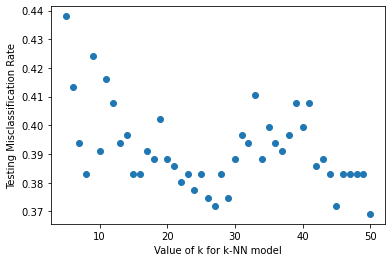

In [298]:
#k-NN Model
#Red Wine Dataset

#List of integers to try as k-values
n_neighbors = range(5,51)

#Initializing list to store misclassification rates
misclass_rate_test = []

#Looping through k-values
for i in n_neighbors:
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.neighbors import KNeighborsClassifier
    classifierkNN1 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    classifierkNN1.fit(x_train1b, y_train1b)
    
    #Calculating Test Model Misclassification Rate
    accuracy = classifierkNN1.score(x_test1b,y_test1b)
    misclass_rate = 1-accuracy
    misclass_rate_test.append(misclass_rate)

#Plotting k-value vs. Test Model Misclassification Rate
from matplotlib.colors import ListedColormap
plt.scatter(n_neighbors, misclass_rate_test)
plt.xlabel('Value of k for k-NN model')
plt.ylabel('Testing Misclassification Rate')

#Printing Minimum Testing Misclassification Rate & corresponding k-value
misclass_rate_min = min(misclass_rate_test)
k_min = n_neighbors[0] + misclass_rate_test.index(misclass_rate_min)
print('RED WINE DATASET:')
print('Minimum Testing Misclassification Rate:', np.round(misclass_rate_min,4))
print('Corresponding k-value:', k_min)
print()

In [299]:
#k-NN Model
#Red Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
classifierkNN1 = KNeighborsClassifier(n_neighbors=50)
classifierkNN1.fit(x_train1b, y_train1b)
    
#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierkNN1, X=x_train1b, y=y_train1b, cv=10)  
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierkNN1.score(x_test1b,y_test1b)
print('Testing Accuracy Rate for k-NN:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for k-NN:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_red = conclusion_be_red.append({'Model':'k-NN w/ BE', 
                                              'Accuracy':np.round_(modelAccuracies.mean(),4)},
                                              ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5562
Standard Deviation of Model Accuracies: 0.0357

Testing Accuracy Rate for k-NN: 0.6309
Testing Misclassification Rate for k-NN: 0.3691


In [300]:
#SVM Model
#Red Wine Dataset

#List of integers to try as poly degrees
degrees = range(2,21)

#Initializing list to store misclassification rates
misclass_rate_test = []
print('RED WINE DATASET:')

#Looping through polynomial model number of degrees
kernel_type = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel_type:
    if i == 'poly':
        for j in degrees:
            #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
            from sklearn.svm import SVC  
            classifierSVC1 = SVC(kernel=i, degree=j)  
            classifierSVC1.fit(x_train1b, y_train1b)
        
            #Calculating Test Model Misclassification Rate
            accuracy = classifierSVC1.score(x_test1b,y_test1b)
            misclass_rate = 1-accuracy
            misclass_rate_test.append(misclass_rate)
        
        #Printing Minimum Poly Model Misclassification Rate & corresponding degree value
        misclass_rate_min = min(misclass_rate_test)
        degree_min = degrees[0] + misclass_rate_test.index(misclass_rate_min)
        print('Minimum Testing Misclassification Rate for',i,'kernel was found using \n',degree_min,'degrees:', np.round_(misclass_rate_min,4))
        print()
        
    else:
        #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
        from sklearn.svm import SVC  
        classifierSVC1 = SVC(kernel=i)  
        classifierSVC1.fit(x_train1b, y_train1b)
        
        #Printing Model Misclassification Rate
        accuracy = classifierSVC1.score(x_test1b,y_test1b)
        misclass_rate = 1-accuracy
        print('Testing Misclassification Rate for',i,'kernel:', np.round(misclass_rate,4))
        print()        

RED WINE DATASET:
Testing Misclassification Rate for linear kernel: 0.3802

Testing Misclassification Rate for rbf kernel: 0.3526

Minimum Testing Misclassification Rate for poly kernel was found using 
 3 degrees: 0.4408

Testing Misclassification Rate for sigmoid kernel: 0.4876



In [301]:
#SVM Model
#Red Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC  
classifierSVC1 = SVC(kernel='rbf')  
classifierSVC1.fit(x_train1b, y_train1b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierSVC1, X=x_train1b, y=y_train1b, cv=10)
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierSVC1.score(x_test1b,y_test1b)
print('Testing Accuracy Rate for SVM:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for SVM:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_red = conclusion_be_red.append({'Model':'SVM w/ BE', 
                                              'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                              ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5622
Standard Deviation of Model Accuracies: 0.045

Testing Accuracy Rate for SVM: 0.6474
Testing Misclassification Rate for SVM: 0.3526


In [302]:
#Naive Bayes Model
#Red Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj  
from sklearn.naive_bayes import GaussianNB
classifierNB1 = GaussianNB()  
classifierNB1.fit(x_train1b, y_train1b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierNB1, X=x_train1b, y=y_train1b, cv=10)  
print('RED WINE DATASET')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierNB1.score(x_test1b,y_test1b)
print('Testing Accuracy Rate for Naive Bayes:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Naive Bayes:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_red = conclusion_be_red.append({'Model':'Naive Bayes w/ BE', 
                                              'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                              ignore_index=True)

RED WINE DATASET
Mean Model Accuracy: 0.5538
Standard Deviation of Model Accuracies: 0.0644

Testing Accuracy Rate for Naive Bayes: 0.5923
Testing Misclassification Rate for Naive Bayes: 0.4077


In [303]:
# #Random Forest Model

# #Red Wine Dataset
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import RandomForestClassifier
# classifierRF1 = RandomForestClassifier(random_state=0)

# grid_param = {
# 'n_estimators': list(range(50,201)),
# 'criterion': ['gini', 'entropy'],
# 'bootstrap': [True, False]
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierRF1, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train1b, y_train1b)
# print('RED WINE DATASET:')
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [304]:
#Random Forest Model
#Red Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierRF1 = RandomForestClassifier(n_estimators=182, criterion='gini', bootstrap=True, random_state=0)
classifierRF1.fit(x_train1b,y_train1b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierRF1, X=x_train1b, y=y_train1b, cv=10) 
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierRF1.score(x_test1b,y_test1b)
print('Testing Accuracy Rate for Random Forest:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Random Forest:', np.round_(misclass_rate,4))

conclusion_be_red = conclusion_be_red.append({'Model':'Random Forest w/ BE', 
                                        'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                        ignore_index=True)

RED WINE DATASET:
Mean Model Accuracy: 0.5775
Standard Deviation of Model Accuracies: 0.0502

Testing Accuracy Rate for Random Forest: 0.6143
Testing Misclassification Rate for Random Forest: 0.3857


Now, let's do the white wine dataset.

In [305]:
#Backward Elimination
import statsmodels.api as sm
x2b = np.append(arr=np.ones((3602,1)).astype(int), values=x2, axis=1)

#Convert to a float64 datatype
x2b = x2b.astype('float64') #Without this, OLS function errors out

#Automatic Backward Elimination
def backwardElimination(df,x,sl):
    cols2 = df.columns
    numVars = len(x[0])
    for i in range(0, numVars):
        obj_OLS = sm.OLS(y2,x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars -i):
                if (obj_OLS.pvalues[j].astype(float)==maxVar):
                    x = np.delete(x,j,1)
                    cols2 = np.delete(cols2,j,0)
    print('REMAINING FEATURES:', cols2)
    obj_OLS.summary()
    return x

df2 = dataset2
SL = 0.05
x2_sig = x2b[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
x2_modeled = backwardElimination(df2,x2_sig,SL)

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train2b, x_test2b, y_train2b, y_test2b = train_test_split(x2_modeled,y2,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train2b = sc_x.fit_transform(x_train2b)
x_test2b = sc_x.transform(x_test2b)

print('Size of the x_train dataset:', np.shape(x_train2b))
print('Size of the y_train dataset:', np.shape(y_train2b))
print('Size of the x_test dataset:', np.shape(x_test2b))
print('Size of the y_test dataset:', np.shape(y_test2b))

REMAINING FEATURES: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')
Size of the x_train dataset: (2521, 11)
Size of the y_train dataset: (2521,)
Size of the x_test dataset: (1081, 11)
Size of the y_test dataset: (1081,)


In [306]:
#Logistic Regression
#White Wine Dataset

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression  
classifierLOR2 = LogisticRegression(random_state=0)  
classifierLOR2.fit(x_train2b, y_train2b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierLOR2, X=x_train2b, y=y_train2b, cv=10)  
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierLOR2.score(x_test2b,y_test2b)
print('Testing Accuracy Rate for Logistic Regression:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Logistic Regression:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_white = conclusion_be_white.append({'Model':'Logistic Regression w/ BE', 
                                                  'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                                  ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.5423
Standard Deviation of Model Accuracies: 0.0217

Testing Accuracy Rate for Logistic Regression: 0.5245
Testing Misclassification Rate for Logistic Regression: 0.4755


WHITE WINE DATASET:
Minimum Testing Misclassification Rate: 0.4588
Corresponding k-value: 17



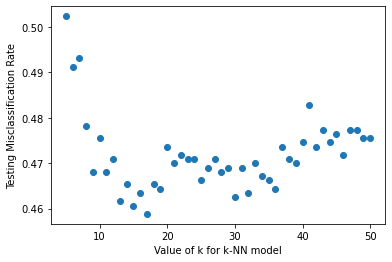

In [307]:
#k-NN Model
#White Wine Dataset

#List of integers to try as k-values
n_neighbors = range(5,51)

#Initializing list to store misclassification rates
misclass_rate_test = []

#Looping through k-values
for i in n_neighbors:
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.neighbors import KNeighborsClassifier
    classifierkNN2 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    classifierkNN2.fit(x_train2b, y_train2b)
    
    #Calculating Test Model Misclassification Rate
    accuracy = classifierkNN2.score(x_test2b,y_test2b)
    misclass_rate = 1-accuracy
    misclass_rate_test.append(misclass_rate)

#Plotting k-value vs. Test Model Misclassification Rate
from matplotlib.colors import ListedColormap
plt.scatter(n_neighbors, misclass_rate_test)
plt.xlabel('Value of k for k-NN model')
plt.ylabel('Testing Misclassification Rate')

#Printing Minimum Testing Misclassification Rate & corresponding k-value
misclass_rate_min = min(misclass_rate_test)
k_min = n_neighbors[0] + misclass_rate_test.index(misclass_rate_min)
print('WHITE WINE DATASET:')
print('Minimum Testing Misclassification Rate:', np.round(misclass_rate_min,4))
print('Corresponding k-value:', k_min)
print()

In [308]:
#k-NN Model
#White Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.neighbors import KNeighborsClassifier
classifierkNN2 = KNeighborsClassifier(n_neighbors=17)
classifierkNN2.fit(x_train2b, y_train2b)
    
#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierkNN1, X=x_train2b, y=y_train2b, cv=10)  
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierkNN2.score(x_test2b,y_test2b)
print('Testing Accuracy Rate for k-NN:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for k-NN:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_white = conclusion_be_white.append({'Model':'k-NN w/ BE', 
                                                  'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                                  ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.5498
Standard Deviation of Model Accuracies: 0.0352

Testing Accuracy Rate for k-NN: 0.5412
Testing Misclassification Rate for k-NN: 0.4588


In [309]:
#SVM model
#White Wine Dataset

#List of integers to try as poly degrees
degrees = range(2,21)

#Initializing list to store misclassification rates
misclass_rate_test = []
print('WHITE WINE DATASET:')

#Looping through polynomial model number of degrees
kernel_type = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel_type:
    if i == 'poly':
        for j in degrees:
            #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
            from sklearn.svm import SVC  
            classifierSVC2 = SVC(kernel=i, degree=j)  
            classifierSVC2.fit(x_train2b, y_train2b)
        
            #Calculating Test Model Misclassification Rate
            accuracy = classifierSVC2.score(x_test2b,y_test2b)
            misclass_rate = 1-accuracy
            misclass_rate_test.append(misclass_rate)
        
        #Printing Minimum Poly Model Misclassification Rate & corresponding degree value
        misclass_rate_min = min(misclass_rate_test)
        degree_min = degrees[0] + misclass_rate_test.index(misclass_rate_min)
        print('Minimum Testing Misclassification Rate for',i,'kernel was found using \n',degree_min,'degrees:', np.round_(misclass_rate_min,4))
        print()
        
    else:
        #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
        from sklearn.svm import SVC  
        classifierSVC2 = SVC(kernel=i)  
        classifierSVC2.fit(x_train2b, y_train2b)
        
        #Printing Model Misclassification Rate
        accuracy = classifierSVC2.score(x_test2b,y_test2b)
        misclass_rate = 1-accuracy
        print('Testing Misclassification Rate for',i,'kernel:', np.round(misclass_rate,4))
        print()        

WHITE WINE DATASET:
Testing Misclassification Rate for linear kernel: 0.4857

Testing Misclassification Rate for rbf kernel: 0.4644

Minimum Testing Misclassification Rate for poly kernel was found using 
 3 degrees: 0.4792

Testing Misclassification Rate for sigmoid kernel: 0.5587



In [310]:
#SVM Model
#White Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC  
classifierSVC2 = SVC(kernel='rbf')  
classifierSVC2.fit(x_train2b, y_train2b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierSVC2, X=x_train2b, y=y_train2b, cv=10)  
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierSVC2.score(x_test2b,y_test2b)
print('Testing Accuracy Rate for SVM:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for SVM:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_white = conclusion_be_white.append({'Model':'SVM w/ BE', 
                                                  'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                                  ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.551
Standard Deviation of Model Accuracies: 0.0399

Testing Accuracy Rate for SVM: 0.5356
Testing Misclassification Rate for SVM: 0.4644


In [311]:
#Naive Bayes Model
#White Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj  
from sklearn.naive_bayes import GaussianNB
classifierNB2 = GaussianNB()  
classifierNB2.fit(x_train2b, y_train2b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierNB2, X=x_train2b, y=y_train2b, cv=10)  
print('WHITE WINE DATASET')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierNB2.score(x_test2b,y_test2b)
print('Testing Accuracy Rate for Naive Bayes:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Naive Bayes:', np.round_(misclass_rate,4))

#Adding to conclusion dataframe
conclusion_be_white = conclusion_be_white.append({'Model':'Naive Bayes w/ BE', 
                                                  'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                                  ignore_index=True)

WHITE WINE DATASET
Mean Model Accuracy: 0.4863
Standard Deviation of Model Accuracies: 0.0176

Testing Accuracy Rate for Naive Bayes: 0.4579
Testing Misclassification Rate for Naive Bayes: 0.5421


In [312]:
# #Random Forest Model

# #White Wine Dataset
# #Using Grid Search

# #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
# from sklearn.ensemble import RandomForestClassifier
# classifierRF2 = RandomForestClassifier(random_state=0)

# grid_param = {
# 'n_estimators': list(range(50,201)),
# 'criterion': ['gini', 'entropy'],
# 'bootstrap': [True, False]
# }

# from sklearn.model_selection import GridSearchCV
# gd_sr = GridSearchCV(estimator=classifierRF1, param_grid=grid_param, scoring='accuracy', cv=10, n_jobs=-1)  
# gd_sr.fit(x_train2b, y_train2b)
# print('WHITE WINE DATASET:')
# print(gd_sr.best_params_)
# print(gd_sr.best_score_)

In [313]:
#Random Forest Model
#White Wine Dataset

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierRF2 = RandomForestClassifier(n_estimators=170, criterion='entropy', bootstrap=True, random_state=0)
classifierRF2.fit(x_train2b,y_train2b)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierRF2, X=x_train2b, y=y_train2b, cv=10)
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

#Printing Testing Misclassification Rate
accuracy = classifierRF2.score(x_test2b,y_test2b)
print('Testing Accuracy Rate for Random Forest:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Random Forest:', np.round_(misclass_rate,4))

conclusion_be_white = conclusion_be_white.append({'Model':'Random Forest w/ BE', 
                                                  'Accuracy':np.round_(modelAccuracies.mean(),4)}, 
                                                  ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.568
Standard Deviation of Model Accuracies: 0.0293

Testing Accuracy Rate for Random Forest: 0.5319
Testing Misclassification Rate for Random Forest: 0.4681


#### PCA

In [314]:
#Initializing dataframes to hold accuracy values
conclusion_pca_red = pd.DataFrame({'Model': [],
                          'Accuracy': []})
conclusion_pca_white = pd.DataFrame({'Model': [],
                          'Accuracy': []})

Let's begin with the red wine dataset.

In [315]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=8)
#Calculate eigenvalues & eigenvectors based on x_train (w-matrix)
x_train_PCA = pcaObj.fit_transform(x_train1)
#Transform x_test (whatever you do on x_train, you do on x_test)
x_test_PCA = pcaObj.transform(x_test1)
components_variance = pcaObj.explained_variance_ratio_
print(sum(components_variance[0:8]))

0.9456121163133475


In [316]:
#PCA/Logistic Reg pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_pca_lor = make_pipeline(pcaObj, classifierLOR1)
pipe_pca_lor.fit(x_train_PCA, y_train1)
y_pred = pipe_pca_lor.predict(x_test_PCA)
accuracy = pipe_pca_lor.score(x_test_PCA, y_test1)
print('Test Accuracy: %.4f'% pipe_pca_lor.score(x_test_PCA, y_test1))

conclusion_pca_red = conclusion_pca_red.append({'Model':'LOR w/ PCA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.6171


In [317]:
#PCA/k-NN pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_pca_kNN = make_pipeline(pcaObj, classifierkNN1)
pipe_pca_kNN.fit(x_train_PCA, y_train1)
y_pred = pipe_pca_kNN.predict(x_test_PCA)
accuracy = pipe_pca_kNN.score(x_test_PCA, y_test1)
print('Test Accuracy: %.4f'% pipe_pca_kNN.score(x_test_PCA, y_test1))

conclusion_pca_red = conclusion_pca_red.append({'Model':'k-NN w/ PCA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.6088


In [318]:
#PCA/SVM pipeline
from sklearn.svm import SVC
pipe_pca_svc = make_pipeline(pcaObj, classifierSVC1)
pipe_pca_svc.fit(x_train_PCA, y_train1)
y_pred = pipe_pca_svc.predict(x_test_PCA)
accuracy = pipe_pca_svc.score(x_test_PCA, y_test1)
print('Test Accuracy: %.4f'% pipe_pca_svc.score(x_test_PCA, y_test1))

conclusion_pca_red = conclusion_pca_red.append({'Model':'SVM w/ PCA', 
                                                'Accuracy':np.round_(accuracy,4)},
                                                ignore_index=True)

Test Accuracy: 0.6364


In [319]:
#PCA/Naive Bayes pipeline
from sklearn.naive_bayes import GaussianNB
pipe_pca_nb = make_pipeline(pcaObj, classifierNB1)
pipe_pca_nb.fit(x_train_PCA, y_train1)
y_pred = pipe_pca_nb.predict(x_test_PCA)
accuracy = pipe_pca_nb.score(x_test_PCA, y_test1)
print('Test Accuracy: %.4f'% pipe_pca_nb.score(x_test_PCA, y_test1))

conclusion_pca_red = conclusion_pca_red.append({'Model':'Naive Bayes w/ PCA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.5620


In [320]:
#PCA/Random Forest
from sklearn.ensemble import RandomForestClassifier
pipe_pca_randfor = make_pipeline(pcaObj, classifierRF1)
pipe_pca_randfor.fit(x_train_PCA, y_train1)
y_pred = pipe_pca_randfor.predict(x_test_PCA)
accuracy = pipe_pca_randfor.score(x_test_PCA, y_test1)
print('Test Accuracy: %.4f'% pipe_pca_randfor.score(x_test_PCA, y_test1))

conclusion_pca_red = conclusion_pca_red.append({'Model':'Random Forest w/ PCA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.5840


Now let's do the white wine dataset.

In [321]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=8)
#Calculate eigenvalues & eigenvectors based on x_train (w-matrix)
x_train_PCA = pcaObj.fit_transform(x_train2)
#Transform x_test (whatever you do on x_train, you do on x_test)
x_test_PCA = pcaObj.transform(x_test2)
components_variance = pcaObj.explained_variance_ratio_
print(sum(components_variance[0:8]))

0.9345017881031314


In [322]:
#PCA/Logistic Reg pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_pca_lor = make_pipeline(pcaObj, classifierLOR2)
pipe_pca_lor.fit(x_train_PCA, y_train2)
y_pred = pipe_pca_lor.predict(x_test_PCA)
accuracy = pipe_pca_lor.score(x_test_PCA, y_test2)
print('Test Accuracy: %.4f'% pipe_pca_lor.score(x_test_PCA, y_test2))

conclusion_pca_white = conclusion_pca_white.append({'Model':'LOR w/ PCA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5180


In [323]:
#PCA/k-NN pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_pca_kNN = make_pipeline(pcaObj, classifierkNN2)
pipe_pca_kNN.fit(x_train_PCA, y_train2)
y_pred = pipe_pca_kNN.predict(x_test_PCA)
accuracy = pipe_pca_kNN.score(x_test_PCA, y_test2)
print('Test Accuracy: %.4f'% pipe_pca_kNN.score(x_test_PCA, y_test2))

conclusion_pca_white = conclusion_pca_white.append({'Model':'k-NN w/ PCA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5254


In [324]:
#PCA/SVM pipeline
from sklearn.svm import SVC
pipe_pca_svc = make_pipeline(pcaObj, classifierSVC2)
pipe_pca_svc.fit(x_train_PCA, y_train2)
y_pred = pipe_pca_svc.predict(x_test_PCA)
accuracy = pipe_pca_svc.score(x_test_PCA, y_test2)
print('Test Accuracy: %.4f'% pipe_pca_svc.score(x_test_PCA, y_test2))

conclusion_pca_white = conclusion_pca_white.append({'Model':'SVM w/ PCA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5273


In [325]:
#PCA/Naive Bayes pipeline
from sklearn.naive_bayes import GaussianNB
pipe_pca_nb = make_pipeline(pcaObj, classifierNB2)
pipe_pca_nb.fit(x_train_PCA, y_train2)
y_pred = pipe_pca_nb.predict(x_test_PCA)
accuracy = pipe_pca_nb.score(x_test_PCA, y_test2)
print('Test Accuracy: %.4f'% pipe_pca_nb.score(x_test_PCA, y_test2))

conclusion_pca_white = conclusion_pca_white.append({'Model':'Naive Bayes w/ PCA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5106


In [326]:
#PCA/Random Forest
from sklearn.ensemble import RandomForestClassifier
pipe_pca_randfor = make_pipeline(pcaObj, classifierRF2)
pipe_pca_randfor.fit(x_train_PCA, y_train2)
y_pred = pipe_pca_randfor.predict(x_test_PCA)
accuracy = pipe_pca_randfor.score(x_test_PCA, y_test2)
print('Test Accuracy: %.4f'% pipe_pca_randfor.score(x_test_PCA, y_test2))

conclusion_pca_white = conclusion_pca_white.append({'Model':'Random Forest w/ PCA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5393


#### LDA

In [327]:
#Initializing dataframes to hold accuracy values
conclusion_lda_red = pd.DataFrame({'Model': [],
                          'Accuracy': []})
conclusion_lda_white = pd.DataFrame({'Model': [],
                          'Accuracy': []})

Let's begin with the red wine dataset.

In [328]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=3)
x_train_LDA = ldaObj.fit_transform(x_train1,y_train1)
x_test_LDA = ldaObj.transform(x_test1)
components_variance = ldaObj.explained_variance_ratio_
print(components_variance)
print(sum(components_variance[0:3]))

[0.88057422 0.07144488 0.03501366]
0.9870327616207974


In [329]:
#LDA/Logistic Reg pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lda_lor = make_pipeline(ldaObj, classifierLOR1)
pipe_lda_lor.fit(x_train_LDA, y_train1)
y_pred = pipe_lda_lor.predict(x_test_LDA)
accuracy = pipe_lda_lor.score(x_test_LDA, y_test1)
print('Test Accuracy: %.4f'% pipe_lda_lor.score(x_test_LDA, y_test1))

conclusion_lda_red = conclusion_lda_red.append({'Model':'LOR w/ LDA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.6309


In [330]:
#LDA/k-NN pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_lda_kNN = make_pipeline(ldaObj, classifierkNN1)
pipe_lda_kNN.fit(x_train_LDA, y_train1)
y_pred = pipe_lda_kNN.predict(x_test_LDA)
accuracy = pipe_lda_kNN.score(x_test_LDA, y_test1)
print('Test Accuracy: %.4f'% pipe_lda_kNN.score(x_test_LDA, y_test1))

conclusion_lda_red = conclusion_lda_red.append({'Model':'k-NN w/ LDA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.6226


In [331]:
#LDA/SVM pipeline
from sklearn.svm import SVC
pipe_lda_svc = make_pipeline(ldaObj, classifierSVC1)
pipe_lda_svc.fit(x_train_LDA, y_train1)
y_pred = pipe_lda_svc.predict(x_test_LDA)
accuracy = pipe_lda_svc.score(x_test_LDA, y_test1)
print('Test Accuracy: %.4f'% pipe_lda_svc.score(x_test_LDA, y_test1))

conclusion_lda_red = conclusion_lda_red.append({'Model':'SVM w/ LDA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.6364


In [332]:
#LDA/Naive Bayes pipeline
from sklearn.naive_bayes import GaussianNB
pipe_lda_nb = make_pipeline(ldaObj, classifierNB1)
pipe_lda_nb.fit(x_train_LDA, y_train1)
y_pred = pipe_lda_nb.predict(x_test_LDA)
accuracy = pipe_lda_nb.score(x_test_LDA, y_test1)
print('Test Accuracy: %.4f'% pipe_lda_nb.score(x_test_LDA, y_test1))

conclusion_lda_red = conclusion_lda_red.append({'Model':'Naive Bayes w/ LDA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.6336


In [333]:
#LDA/Random Forest pipeline
from sklearn.ensemble import RandomForestClassifier
pipe_lda_randfor = make_pipeline(ldaObj, classifierRF1)
pipe_lda_randfor.fit(x_train_LDA, y_train1)
y_pred = pipe_lda_randfor.predict(x_test_LDA)
accuracy = pipe_lda_randfor.score(x_test_LDA, y_test1)
print('Test Accuracy: %.4f'% pipe_lda_randfor.score(x_test_LDA, y_test1))

conclusion_lda_red = conclusion_lda_red.append({'Model':'Random Forest w/ LDA', 
                                                'Accuracy':np.round_(accuracy,4)}, 
                                                ignore_index=True)

Test Accuracy: 0.5592


Now let's do the white wine dataset.

In [334]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=3)
x_train_LDA = ldaObj.fit_transform(x_train2,y_train2)
x_test_LDA = ldaObj.transform(x_test2)
components_variance = ldaObj.explained_variance_ratio_
print(components_variance)
print(sum(components_variance[0:2]))

[0.87526856 0.08171505 0.03827053]
0.9569836090164415


In [335]:
#LDA/Logistic Reg pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lda_lor = make_pipeline(ldaObj, classifierLOR2)
pipe_lda_lor.fit(x_train_LDA, y_train2)
y_pred = pipe_lda_lor.predict(x_test_LDA)
accuracy = pipe_lda_lor.score(x_test_LDA, y_test2)
print('Test Accuracy: %.4f'% pipe_lda_lor.score(x_test_LDA, y_test2))

conclusion_lda_white = conclusion_lda_white.append({'Model':'LOR w/ LDA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5254


In [336]:
#LDA/k-NN pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_lda_kNN = make_pipeline(ldaObj, classifierkNN2)
pipe_lda_kNN.fit(x_train_LDA, y_train2)
y_pred = pipe_lda_kNN.predict(x_test_LDA)
accuracy = pipe_lda_kNN.score(x_test_LDA, y_test2)
print('Test Accuracy: %.4f'% pipe_lda_kNN.score(x_test_LDA, y_test2))

conclusion_lda_white = conclusion_lda_white.append({'Model':'k-NN w/ LDA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5208


In [337]:
#LDA/SVM pipeline
from sklearn.svm import SVC
pipe_lda_svc = make_pipeline(ldaObj, classifierSVC2)
pipe_lda_svc.fit(x_train_LDA, y_train2)
y_pred = pipe_lda_svc.predict(x_test_LDA)
accuracy = pipe_lda_svc.score(x_test_LDA, y_test2)
print('Test Accuracy: %.4f'% pipe_lda_svc.score(x_test_LDA, y_test2))

conclusion_lda_white = conclusion_lda_white.append({'Model':'SVM w/ LDA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5328


In [338]:
#LDA/Naive Bayes pipeline
from sklearn.naive_bayes import GaussianNB
pipe_lda_nb = make_pipeline(ldaObj, classifierNB2)
pipe_lda_nb.fit(x_train_LDA, y_train2)
y_pred = pipe_lda_nb.predict(x_test_LDA)
accuracy = pipe_lda_nb.score(x_test_LDA, y_test2)
print('Test Accuracy: %.4f'% pipe_lda_nb.score(x_test_LDA, y_test2))

conclusion_lda_white = conclusion_lda_white.append({'Model':'Naive Bayes w/ LDA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5310


In [339]:
#LDA/Random Forest
from sklearn.ensemble import RandomForestClassifier
pipe_lda_randfor = make_pipeline(ldaObj, classifierRF2)
pipe_lda_randfor.fit(x_train_LDA, y_train2)
y_pred = pipe_lda_randfor.predict(x_test_LDA)
accuracy = pipe_lda_randfor.score(x_test_LDA, y_test2)
print('Test Accuracy: %.4f'% pipe_lda_randfor.score(x_test_LDA, y_test2))

conclusion_lda_white = conclusion_lda_white.append({'Model':'Random Forest w/ LDA', 
                                                    'Accuracy':np.round_(accuracy,4)}, 
                                                    ignore_index=True)

Test Accuracy: 0.5069


#### Kernel PCA

In [340]:
#Initializing dataframes to hold accuracy values
conclusion_kPCA_red = pd.DataFrame({'Model': [],
                          'Accuracy': []})
conclusion_kPCA_white = pd.DataFrame({'Model': [],
                          'Accuracy': []})

Let's begin with the red wine dataset.

In [341]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=11, kernel='rbf')
x_train_kPCA = kernelPCAObj.fit_transform(x_train1)
x_test_kPCA = kernelPCAObj.transform(x_test1)

In [342]:
#kernel PCA/Logistic Reg pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_kPCA_lor = make_pipeline(kernelPCAObj, classifierLOR1)
pipe_kPCA_lor.fit(x_train_kPCA, y_train1)
y_pred = pipe_kPCA_lor.predict(x_test_kPCA)
accuracy = pipe_kPCA_lor.score(x_test_kPCA, y_test1)
print('Test Accuracy: %.4f'% pipe_kPCA_lor.score(x_test_kPCA, y_test1))

conclusion_kPCA_red = conclusion_kPCA_red.append({'Model':'LOR w/ kPCA', 
                                                  'Accuracy':np.round_(accuracy,4)}, 
                                                  ignore_index=True)

Test Accuracy: 0.6281


In [343]:
#kernel PCA/kNN pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_kPCA_kNN = make_pipeline(kernelPCAObj, classifierkNN1)
pipe_kPCA_kNN.fit(x_train_kPCA, y_train1)
y_pred = pipe_kPCA_kNN.predict(x_test_kPCA)
accuracy = pipe_kPCA_kNN.score(x_test_kPCA, y_test1)
print('Test Accuracy: %.4f'% pipe_kPCA_kNN.score(x_test_kPCA, y_test1))

conclusion_kPCA_red = conclusion_kPCA_red.append({'Model':'k-NN w/ kPCA', 
                                                  'Accuracy':np.round_(accuracy,4)}, 
                                                  ignore_index=True)

Test Accuracy: 0.5868


In [344]:
#kernel PCA/SVM pipeline
from sklearn.svm import SVC
pipe_kPCA_SVC = make_pipeline(kernelPCAObj, classifierSVC1)
pipe_kPCA_SVC.fit(x_train_kPCA, y_train1)
y_pred = pipe_kPCA_SVC.predict(x_test_kPCA)
accuracy = pipe_kPCA_SVC.score(x_test_kPCA, y_test1)
print('Test Accuracy: %.4f'% pipe_kPCA_SVC.score(x_test_kPCA, y_test1))

conclusion_kPCA_red = conclusion_kPCA_red.append({'Model':'SVM w/ kPCA', 
                                                  'Accuracy':np.round_(accuracy,4)}, 
                                                  ignore_index=True)

Test Accuracy: 0.6198


In [345]:
#kernel PCA/Naive Bayes pipeline
from sklearn.naive_bayes import GaussianNB
pipe_kPCA_nb = make_pipeline(kernelPCAObj, classifierNB1)
pipe_kPCA_nb.fit(x_train_kPCA, y_train1)
y_pred = pipe_kPCA_nb.predict(x_test_kPCA)
accuracy = pipe_kPCA_nb.score(x_test_kPCA, y_test1)
print('Test Accuracy: %.4f'% pipe_kPCA_nb.score(x_test_kPCA, y_test1))

conclusion_kPCA_red = conclusion_kPCA_red.append({'Model':'Naive Bayes w/ kPCA', 
                                                  'Accuracy':np.round_(accuracy,4)}, 
                                                  ignore_index=True)

Test Accuracy: 0.6088


In [346]:
#kernel PCA/Random Forest
from sklearn.ensemble import RandomForestClassifier
pipe_kPCA_randfor = make_pipeline(kernelPCAObj, classifierRF1)
pipe_kPCA_randfor.fit(x_train_kPCA, y_train1)
y_pred = pipe_kPCA_randfor.predict(x_test_kPCA)
accuracy = pipe_kPCA_randfor.score(x_test_kPCA, y_test1)
print('Test Accuracy: %.4f'% pipe_kPCA_randfor.score(x_test_kPCA, y_test1))

conclusion_kPCA_red = conclusion_kPCA_red.append({'Model':'Random Forest w/ kPCA', 
                                                  'Accuracy':np.round_(accuracy,4)}, 
                                                  ignore_index=True)

Test Accuracy: 0.6501


Now let's do the white wine dataset.

In [347]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=11, kernel='rbf')
x_train_kPCA = kernelPCAObj.fit_transform(x_train2)
x_test_kPCA = kernelPCAObj.transform(x_test2)

In [348]:
#kernel PCA/Logistic Reg pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_kPCA_lor = make_pipeline(kernelPCAObj, classifierLOR2)
pipe_kPCA_lor.fit(x_train_kPCA, y_train2)
y_pred = pipe_kPCA_lor.predict(x_test_kPCA)
accuracy = pipe_kPCA_lor.score(x_test_kPCA, y_test2)
print('Test Accuracy: %.4f'% pipe_kPCA_lor.score(x_test_kPCA, y_test2))

conclusion_kPCA_white = conclusion_kPCA_white.append({'Model':'LOR w/ kPCA', 
                                                      'Accuracy':np.round_(accuracy,4)}, 
                                                      ignore_index=True)

Test Accuracy: 0.5227


In [349]:
#kernel PCA/kNN pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_kPCA_kNN = make_pipeline(kernelPCAObj, classifierkNN2)
pipe_kPCA_kNN.fit(x_train_kPCA, y_train2)
y_pred = pipe_kPCA_kNN.predict(x_test_kPCA)
accuracy = pipe_kPCA_kNN.score(x_test_kPCA, y_test2)
print('Test Accuracy: %.4f'% pipe_kPCA_kNN.score(x_test_kPCA, y_test2))

conclusion_kPCA_white = conclusion_kPCA_white.append({'Model':'k-NN w/ kPCA', 
                                                      'Accuracy':np.round_(accuracy,4)}, 
                                                      ignore_index=True)

Test Accuracy: 0.5180


In [350]:
#kernel PCA/SVM pipeline
from sklearn.svm import SVC
pipe_kPCA_svc = make_pipeline(kernelPCAObj, classifierSVC2)
pipe_kPCA_svc.fit(x_train_kPCA, y_train2)
y_pred = pipe_kPCA_svc.predict(x_test_kPCA)
accuracy = pipe_kPCA_svc.score(x_test_kPCA, y_test2)
print('Test Accuracy: %.4f'% pipe_kPCA_svc.score(x_test_kPCA, y_test2))

conclusion_kPCA_white = conclusion_kPCA_white.append({'Model':'SVM w/ kPCA', 
                                                      'Accuracy':np.round_(accuracy,4)}, 
                                                      ignore_index=True)

Test Accuracy: 0.5439


In [351]:
#kPCA/Naive Bayes pipeline
from sklearn.naive_bayes import GaussianNB
pipe_kPCA_nb = make_pipeline(kernelPCAObj, classifierNB2)
pipe_kPCA_nb.fit(x_train_kPCA, y_train2)
y_pred = pipe_kPCA_nb.predict(x_test_kPCA)
accuracy = pipe_kPCA_nb.score(x_test_kPCA, y_test2)
print('Test Accuracy: %.4f'% pipe_kPCA_nb.score(x_test_kPCA, y_test2))

conclusion_kPCA_white = conclusion_kPCA_white.append({'Model':'Naive Bayes w/ kPCA', 
                                                      'Accuracy':np.round_(accuracy,4)}, 
                                                      ignore_index=True)

Test Accuracy: 0.5208


In [352]:
#kernel PCA/Random Forest pipeline
from sklearn.ensemble import RandomForestClassifier
pipe_kPCA_randfor = make_pipeline(kernelPCAObj, classifierRF2)
pipe_kPCA_randfor.fit(x_train_kPCA, y_train2)
y_pred = pipe_kPCA_randfor.predict(x_test_kPCA)
accuracy = pipe_kPCA_randfor.score(x_test_kPCA, y_test2)
print('Test Accuracy: %.4f'% pipe_kPCA_randfor.score(x_test_kPCA, y_test2))

conclusion_kPCA_white = conclusion_kPCA_white.append({'Model':'Random Forest w/ kPCA', 
                                                      'Accuracy':np.round_(accuracy,4)}, 
                                                      ignore_index=True)

Test Accuracy: 0.5264


### Summary
#### Let's take a look at the accuracies of each model for both the red and white wine datasets:

In [353]:
conclusion_red = conclusion_red.append([conclusion_be_red,conclusion_pca_red,conclusion_lda_red,conclusion_kPCA_red], ignore_index=True)
conclusion_red

,Model,Accuracy
0,Logistic Regression,0.6364
1,k-NN,0.5895
2,SVM,0.6446
3,Naive Bayes,0.5702
4,Random Forest,0.6143
5,Ensemble,0.6419
6,Extra Trees,0.6446
7,Gradient Boosting,0.6171
8,Logistic Regression w/ BE,0.5799
9,k-NN w/ BE,0.5562


In [354]:
conclusion_white = conclusion_white.append([conclusion_be_white,conclusion_pca_white,conclusion_lda_white,conclusion_kPCA_white], ignore_index=True)
conclusion_white

,Model,Accuracy
0,Logistic Regression,0.5199
1,k-NN,0.5467
2,SVM,0.5486
3,Naive Bayes,0.4662
4,Random Forest,0.5449
5,Ensemble,0.5439
6,Extra Trees,0.5421
7,Gradient Boosting,0.5467
8,Logistic Regression w/ BE,0.5423
9,k-NN w/ BE,0.5498


#### Optimizing accuracy

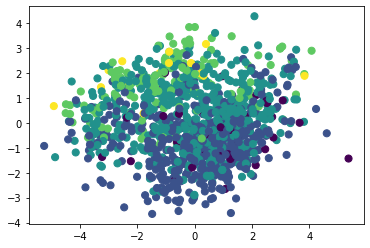

In [355]:
# Doing standardization/normalization
sc1 = StandardScaler()
x1 = sc1.fit_transform(x1)
sc2 = StandardScaler()
x2 = sc2.fit_transform(x2)

df1 = dataset1.drop(['quality'], axis=1)
df2 = dataset2.drop(['quality'], axis=1)
df_x1 = pd.DataFrame(data=x1, columns=list(df1))
df_x2 = pd.DataFrame(data=x2, columns=list(df2))

# Plotting using PCA to show distribution of classes for red wine
pca_red = PCA(n_components=2)
X_tr_red = pca_red.fit_transform(x1)
y_tr_red = y1
plt.scatter(X_tr_red[:, 0], X_tr_red[:, 1], s = 50, c = y_tr_red)

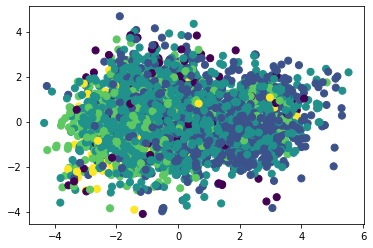

In [356]:
# Plotting using PCA to show distribution of classes for white wine
pca_white = PCA(n_components=2)
X_tr_white = pca_white.fit_transform(x2)
y_tr_white = y2
plt.scatter(X_tr_white[:, 0], X_tr_white[:, 1], s = 50, c = y_tr_white)

In [357]:
# Any row belonging to quality 6 that is greater than the mean of all rows belonging to quality 6 is changed to quality 6.5
#red wine

df_x1['quality'] = y1.tolist()
#print(df_x1)
x1_6 = df_x1.loc[df_x1['quality'] == 6]
mean_6 = x1_6.mean()
#print(mean_6)
df_x1.loc[((df_x1['fixed acidity'] > float(mean_6[0])) & (df_x1['volatile acidity'] > float(mean_6[1])) & 
                (df_x1['citric acid'] > float(mean_6[2])) & (df_x1['residual sugar'] > float(mean_6[3])) & 
                (df_x1['chlorides'] > float(mean_6[4])) & (df_x1['free sulfur dioxide'] > float(mean_6[5])) & 
                (df_x1['total sulfur dioxide'] > float(mean_6[6])) & (df_x1['density'] > float(mean_6[7])) & 
                (df_x1['pH'] > float(mean_6[8])) & (df_x1['sulphates'] > float(mean_6[9])) & 
                (df_x1['alcohol'] > float(mean_6[10])) & (df_x1['quality'] == 6)), 'quality'] = 6.5
# Split into train and test data 90/10
train_red, test_red = train_test_split(df_x1, train_size=0.9, test_size=0.1, random_state=0)

# Any row belonging to quality 6 that is greater than the mean of all rows belonging to quality 6 is changed to quality 6.5
#white wine

df_x2['quality'] = y2.tolist()
#print(df_x2)
x2_6 = df_x2.loc[df_x2['quality'] == 6]
mean2_6 = x2_6.mean()
#print(mean_6)
df_x2.loc[((df_x2['fixed acidity'] > float(mean2_6[0])) & (df_x2['volatile acidity'] > float(mean2_6[1])) & 
                (df_x2['citric acid'] > float(mean2_6[2])) & (df_x2['residual sugar'] > float(mean2_6[3])) & 
                (df_x2['chlorides'] > float(mean2_6[4])) & (df_x2['free sulfur dioxide'] > float(mean2_6[5])) & 
                (df_x2['total sulfur dioxide'] > float(mean2_6[6])) & (df_x2['density'] > float(mean2_6[7])) & 
                (df_x2['pH'] > float(mean2_6[8])) & (df_x2['sulphates'] > float(mean2_6[9])) & 
                (df_x2['alcohol'] > float(mean2_6[10])) & (df_x2['quality'] == 6)), 'quality'] = 6.5
# Split into train and test data 90/10
train_white, test_white = train_test_split(df_x2, train_size=0.9, test_size=0.1, random_state=0)

In [358]:
# Used plotting PCA to divide data into two quality groups
def quality_group(quality):
    if quality == 3 or quality == 4 or quality == 5 or quality == 6: 
        return 0 #bad wine - group 1
    else:
        return 1 #good wine - group 2

In [359]:
# Preparing the data
train_red['new_quality'] = train_red.apply(lambda x: quality_group(x['quality']), axis=1)
test_red['new_quality'] = test_red.apply(lambda x: quality_group(x['quality']), axis=1)

train_white['new_quality'] = train_white.apply(lambda x: quality_group(x['quality']), axis=1)
test_white['new_quality'] = test_white.apply(lambda x: quality_group(x['quality']), axis=1)

X_train_red = train_red.drop(columns=['quality', 'new_quality'])
y_train_red = train_red[['new_quality']]
X_test_red = test_red.drop(columns=['quality', 'new_quality'])
y_test_red = test_red[['new_quality']]
test3_red = test_red

X_train_white = train_white.drop(columns=['quality', 'new_quality'])
y_train_white = train_white[['new_quality']]
X_test_white= test_white.drop(columns=['quality', 'new_quality'])
y_test_white = test_white[['new_quality']]
test3_white = test_white

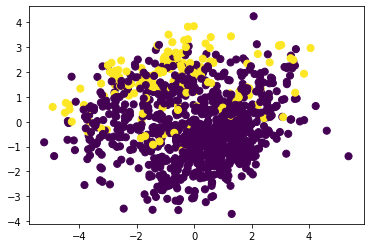

In [360]:
# Plotting using PCA to show distribution of classes - RED quality groups
pca_red2 = PCA(n_components=2)
X_tr_red2 = pca_red2.fit_transform(X_train_red)
y_tr_red2 = y_train_red.to_numpy()
plt.scatter(X_tr_red2[:, 0], X_tr_red2[:, 1], s = 50, c = y_tr_red2)

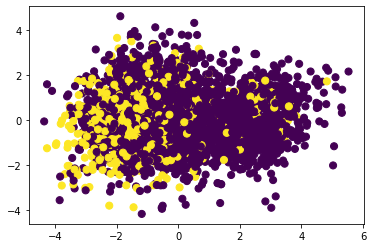

In [361]:
# Plotting using PCA to show distribution of classes - WHITE quality groups
pca_white2 = PCA(n_components=2)
X_tr_white2 = pca_white2.fit_transform(X_train_white)
y_tr_white2 = y_train_white.to_numpy()
plt.scatter(X_tr_white2[:, 0], X_tr_white2[:, 1], s = 50, c = y_tr_white2)

In [362]:
# DNN-Red


kfold = 10
dataset_red2=make_dataset(X_train_red.values, y_train_red.to_numpy(), kfold)
input_size = X_train_red.shape[1]

model_red2 = tf.keras.Sequential()
model_red2.add(tf.keras.layers.InputLayer(input_shape=(input_size, )))
model_red.add(tf.keras.layers.Dense(128, activation='tanh'))
model_red2.add(tf.keras.layers.Dense(64, activation='tanh'))
model_red2.add(tf.keras.layers.Dense(32, activation='tanh'))
model_red2.add(tf.keras.layers.Dense(2, activation='relu'))

model_red2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

model_red2_cval_avg = 0
for X_train_red2, y_train_red2, X_test_red2, y_test_red2 in dataset_red2:
    model_red2.fit(X_train_red2, y_train_red2, epochs=100)
    test_loss, test_acc_dnn_red2 = model_red2.evaluate(X_test_red2, y_test_red2, verbose=2)
    misclass_rate = 1-test_acc_dnn_red2
    model_red2_cval_avg = model_red2_cval_avg + test_acc_dnn_red2
    print('Misclassification Rate:', np.round_(misclass_rate,4))
    print('The accuracy rate of the model is:', test_acc_dnn_red2)

model_red2_cval_avg = model_red2_cval_avg / kfold

Epoch 1/100
31/31 [==============================] - 0s 839us/step - loss: 0.5118 - accuracy: 0.8098
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8650
Epoch 3/100
31/31 [==============================] - 0s 968us/step - loss: 0.3626 - accuracy: 0.8548
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8640
Epoch 5/100
31/31 [==============================] - 0s 935us/step - loss: 0.3303 - accuracy: 0.8497
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8650
Epoch 7/100
31/31 [==============================] - 0s 968us/step - loss: 0.2904 - accuracy: 0.8691
Epoch 8/100
31/31 [==============================] - 0s 903us/step - loss: 0.2838 - accuracy: 0.8753
Epoch 9/100
31/31 [==============================] - 0s 1000us/step - loss: 0.2777 - accuracy: 0.8783
Epoch 10/100
31/31 [==============================] - 0s 903us/step - loss: 0.2725 - accuracy: 0

31/31 [==============================] - 0s 968us/step - loss: 0.1832 - accuracy: 0.9110
Epoch 82/100
31/31 [==============================] - 0s 936us/step - loss: 0.1818 - accuracy: 0.9151
Epoch 83/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9070
Epoch 84/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9182
Epoch 85/100
31/31 [==============================] - 0s 1000us/step - loss: 0.1782 - accuracy: 0.9090
Epoch 86/100
31/31 [==============================] - 0s 968us/step - loss: 0.1758 - accuracy: 0.9121
Epoch 87/100
31/31 [==============================] - 0s 1000us/step - loss: 0.1766 - accuracy: 0.9141
Epoch 88/100
31/31 [==============================] - 0s 968us/step - loss: 0.1741 - accuracy: 0.9162
Epoch 89/100
31/31 [==============================] - 0s 936us/step - loss: 0.1739 - accuracy: 0.9131
Epoch 90/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.92

31/31 [==============================] - 0s 968us/step - loss: 0.1192 - accuracy: 0.9335
Epoch 61/100
31/31 [==============================] - 0s 871us/step - loss: 0.1177 - accuracy: 0.9325
Epoch 62/100
31/31 [==============================] - 0s 935us/step - loss: 0.1183 - accuracy: 0.9315
Epoch 63/100
31/31 [==============================] - 0s 839us/step - loss: 0.1181 - accuracy: 0.9356
Epoch 64/100
31/31 [==============================] - 0s 871us/step - loss: 0.1143 - accuracy: 0.9356
Epoch 65/100
31/31 [==============================] - 0s 806us/step - loss: 0.1133 - accuracy: 0.9356
Epoch 66/100
31/31 [==============================] - 0s 839us/step - loss: 0.1150 - accuracy: 0.9305
Epoch 67/100
31/31 [==============================] - 0s 871us/step - loss: 0.1133 - accuracy: 0.9376
Epoch 68/100
31/31 [==============================] - 0s 839us/step - loss: 0.1122 - accuracy: 0.9346
Epoch 69/100
31/31 [==============================] - 0s 903us/step - loss: 0.1111 - accuracy: 

31/31 [==============================] - 0s 871us/step - loss: 0.0775 - accuracy: 0.9417
Epoch 40/100
31/31 [==============================] - 0s 935us/step - loss: 0.0768 - accuracy: 0.9407
Epoch 41/100
31/31 [==============================] - 0s 968us/step - loss: 0.0768 - accuracy: 0.9397
Epoch 42/100
31/31 [==============================] - 0s 935us/step - loss: 0.0757 - accuracy: 0.9397
Epoch 43/100
31/31 [==============================] - 0s 839us/step - loss: 0.0756 - accuracy: 0.9427
Epoch 44/100
31/31 [==============================] - 0s 837us/step - loss: 0.0768 - accuracy: 0.9417
Epoch 45/100
31/31 [==============================] - 0s 903us/step - loss: 0.0758 - accuracy: 0.9397
Epoch 46/100
31/31 [==============================] - 0s 839us/step - loss: 0.0765 - accuracy: 0.9387
Epoch 47/100
31/31 [==============================] - 0s 871us/step - loss: 0.0757 - accuracy: 0.9407
Epoch 48/100
31/31 [==============================] - 0s 871us/step - loss: 0.0741 - accuracy: 

31/31 [==============================] - 0s 903us/step - loss: 0.0513 - accuracy: 0.9519
Epoch 19/100
31/31 [==============================] - 0s 935us/step - loss: 0.0508 - accuracy: 0.9540
Epoch 20/100
31/31 [==============================] - 0s 935us/step - loss: 0.0511 - accuracy: 0.9530
Epoch 21/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9519
Epoch 22/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9519
Epoch 23/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9530
Epoch 24/100
31/31 [==============================] - 0s 1000us/step - loss: 0.0504 - accuracy: 0.9550
Epoch 25/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9519
Epoch 26/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9550
Epoch 27/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9550
Epoc

31/31 [==============================] - 0s 936us/step - loss: 0.0376 - accuracy: 0.9611
Epoch 99/100
31/31 [==============================] - 0s 871us/step - loss: 0.0374 - accuracy: 0.9642
Epoch 100/100
31/31 [==============================] - 0s 903us/step - loss: 0.0373 - accuracy: 0.9632
4/4 - 0s - loss: 0.2844 - accuracy: 0.8991
Misclassification Rate: 0.1009
The accuracy rate of the model is: 0.8990825414657593
Epoch 1/100
31/31 [==============================] - 0s 1000us/step - loss: 0.0709 - accuracy: 0.9519
Epoch 2/100
31/31 [==============================] - 0s 912us/step - loss: 0.0566 - accuracy: 0.9591
Epoch 3/100
31/31 [==============================] - 0s 871us/step - loss: 0.0465 - accuracy: 0.9601
Epoch 4/100
31/31 [==============================] - 0s 807us/step - loss: 0.0457 - accuracy: 0.9591
Epoch 5/100
31/31 [==============================] - 0s 839us/step - loss: 0.0428 - accuracy: 0.9642
Epoch 6/100
31/31 [==============================] - 0s 903us/step - los

31/31 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9785
Epoch 78/100
31/31 [==============================] - 0s 968us/step - loss: 0.0226 - accuracy: 0.9796
Epoch 79/100
31/31 [==============================] - 0s 967us/step - loss: 0.0223 - accuracy: 0.9785
Epoch 80/100
31/31 [==============================] - 0s 935us/step - loss: 0.0220 - accuracy: 0.9785
Epoch 81/100
31/31 [==============================] - 0s 968us/step - loss: 0.0223 - accuracy: 0.9785
Epoch 82/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9796
Epoch 83/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9785
Epoch 84/100
31/31 [==============================] - 0s 1000us/step - loss: 0.0216 - accuracy: 0.9796
Epoch 85/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9785
Epoch 86/100
31/31 [==============================] - 0s 968us/step - loss: 0.0212 - accuracy: 0.9775


31/31 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9785
Epoch 57/100
31/31 [==============================] - 0s 968us/step - loss: 0.0202 - accuracy: 0.9796
Epoch 58/100
31/31 [==============================] - 0s 935us/step - loss: 0.0205 - accuracy: 0.9775
Epoch 59/100
31/31 [==============================] - 0s 839us/step - loss: 0.0205 - accuracy: 0.9796
Epoch 60/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9785
Epoch 61/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9796
Epoch 62/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9785
Epoch 63/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9806
Epoch 64/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9806
Epoch 65/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9806
Epoch 6

31/31 [==============================] - 0s 903us/step - loss: 0.0128 - accuracy: 0.9867
Epoch 37/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9867
Epoch 38/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9867
Epoch 39/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9857
Epoch 40/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9857
Epoch 41/100
31/31 [==============================] - 0s 968us/step - loss: 0.0136 - accuracy: 0.9867
Epoch 42/100
31/31 [==============================] - 0s 935us/step - loss: 0.0130 - accuracy: 0.9867
Epoch 43/100
31/31 [==============================] - 0s 903us/step - loss: 0.0129 - accuracy: 0.9867
Epoch 44/100
31/31 [==============================] - 0s 968us/step - loss: 0.0132 - accuracy: 0.9857
Epoch 45/100
31/31 [==============================] - 0s 935us/step - loss: 0.0128 - accuracy: 0.9867
E

31/31 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9867
Epoch 16/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9867
Epoch 17/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9867
Epoch 18/100
31/31 [==============================] - 0s 871us/step - loss: 0.0127 - accuracy: 0.9867
Epoch 19/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9867
Epoch 20/100
31/31 [==============================] - 0s 968us/step - loss: 0.0126 - accuracy: 0.9867
Epoch 21/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9867
Epoch 22/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9867
Epoch 23/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9867
Epoch 24/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9867
Epoch 25/

31/31 [==============================] - 0s 1000us/step - loss: 0.0117 - accuracy: 0.9877
Epoch 97/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9877
Epoch 98/100
31/31 [==============================] - 0s 1000us/step - loss: 0.0117 - accuracy: 0.9877
Epoch 99/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9877
Epoch 100/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9877
4/4 - 0s - loss: 0.0170 - accuracy: 0.9907
Misclassification Rate: 0.0093
The accuracy rate of the model is: 0.9907407164573669
Epoch 1/100
31/31 [==============================] - 0s 924us/step - loss: 0.0108 - accuracy: 0.9898
Epoch 2/100
31/31 [==============================] - 0s 935us/step - loss: 0.0139 - accuracy: 0.9898
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9908
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.00

31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 76/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 77/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 78/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 79/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 80/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 81/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 82/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9908
Epoch 83/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9898
Epoch 84/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9898
Epoch 85/100


31/31 [==============================] - 0s 935us/step - loss: 0.0086 - accuracy: 0.9918
Epoch 55/100
31/31 [==============================] - 0s 935us/step - loss: 0.0086 - accuracy: 0.9918
Epoch 56/100
31/31 [==============================] - 0s 935us/step - loss: 0.0086 - accuracy: 0.9918
Epoch 57/100
31/31 [==============================] - 0s 968us/step - loss: 0.0086 - accuracy: 0.9918
Epoch 58/100
31/31 [==============================] - 0s 968us/step - loss: 0.0087 - accuracy: 0.9918
Epoch 59/100
31/31 [==============================] - 0s 903us/step - loss: 0.0088 - accuracy: 0.9908
Epoch 60/100
31/31 [==============================] - 0s 903us/step - loss: 0.0092 - accuracy: 0.9918
Epoch 61/100
31/31 [==============================] - 0s 936us/step - loss: 0.0088 - accuracy: 0.9908
Epoch 62/100
31/31 [==============================] - 0s 903us/step - loss: 0.0093 - accuracy: 0.9918
Epoch 63/100
31/31 [==============================] - 0s 871us/step - loss: 0.0087 - accuracy: 

In [363]:
#DNN-White
kfold = 10
dataset_white2=make_dataset(X_train_white.values, y_train_white.to_numpy(), kfold)
input_size = X_train_white.shape[1]

model_white2 = tf.keras.Sequential()
model_white2.add(tf.keras.layers.InputLayer(input_shape=(input_size, )))
model_white2.add(tf.keras.layers.Dense(128, activation='tanh'))
model_white2.add(tf.keras.layers.Dense(64, activation='tanh'))
model_white2.add(tf.keras.layers.Dense(32, activation='tanh'))
model_white2.add(tf.keras.layers.Dense(2, activation='relu'))

model_white2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

model_white2_cval_avg = 0
for X_train_white2, y_train_white2, X_test_white2, y_test_white2 in dataset_white2:
    model_white2.fit(X_train_white2, y_train_white2, epochs=100)
    test_loss, test_acc_dnn_white2 = model_white2.evaluate(X_test_white2, y_test_white2, verbose=2)
    misclass_rate = 1-test_acc_dnn_white2
    model_white2_cval_avg = model_white2_cval_avg + test_acc_dnn_white2
    print('Misclassification Rate:', np.round_(misclass_rate,4))
    print('The accuracy rate of the model is:', test_acc_dnn_white2, 4)

model_white2_cval_avg = model_white2_cval_avg / kfold

Epoch 1/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7709
Epoch 2/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.7963
Epoch 3/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8121
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8117
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8117
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8169
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8165
Epoch 8/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8138
Epoch 9/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8152
Epoch 10/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8141
Epoch 11/

Epoch 83/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1563 - accuracy: 0.8872
Epoch 84/100
92/92 [==============================] - 0s 989us/step - loss: 0.1515 - accuracy: 0.8903
Epoch 85/100
92/92 [==============================] - 0s 967us/step - loss: 0.1500 - accuracy: 0.8906
Epoch 86/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.8896
Epoch 87/100
92/92 [==============================] - 0s 978us/step - loss: 0.1448 - accuracy: 0.8913
Epoch 88/100
92/92 [==============================] - 0s 1000us/step - loss: 0.1427 - accuracy: 0.8920
Epoch 89/100
92/92 [==============================] - 0s 978us/step - loss: 0.1405 - accuracy: 0.8933
Epoch 90/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.8920
Epoch 91/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.8944
Epoch 92/100
92/92 [==============================] - 0s 989us/step - loss: 0.1346 - accu

92/92 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9520
Epoch 64/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9541
Epoch 65/100
92/92 [==============================] - 0s 1000us/step - loss: 0.0514 - accuracy: 0.9544
Epoch 66/100
92/92 [==============================] - 0s 1000us/step - loss: 0.0502 - accuracy: 0.9541
Epoch 67/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9547
Epoch 68/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9568
Epoch 69/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9578
Epoch 70/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9558
Epoch 71/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9575
Epoch 72/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9561
Epoch 7

92/92 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9743
Epoch 44/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9541
Epoch 45/100
92/92 [==============================] - 0s 967us/step - loss: 0.0583 - accuracy: 0.9647
Epoch 46/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9667
Epoch 47/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9733
Epoch 48/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9760
Epoch 49/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9760
Epoch 50/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9767
Epoch 51/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9770
Epoch 52/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9774
Epoch 53/10

92/92 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9835
Epoch 24/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9835
Epoch 25/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9832
Epoch 26/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9829
Epoch 27/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9835
Epoch 28/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9839
Epoch 29/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9835
Epoch 30/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9835
Epoch 31/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9835
Epoch 32/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9835
Epoch 33/100


92/92 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9849
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9877
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.9918
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9938
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9935
Epoch 8/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9935
Epoch 9/100
92/92 [==============================] - 0s 989us/step - loss: 0.0106 - accuracy: 0.9935
Epoch 10/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9942
Epoch 11/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9945
Epoch 12/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9938
Epoch 13/100
92/9

92/92 [==============================] - 0s 978us/step - loss: 0.0051 - accuracy: 0.9976
Epoch 85/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9976
Epoch 86/100
92/92 [==============================] - 0s 989us/step - loss: 0.0049 - accuracy: 0.9973
Epoch 87/100
92/92 [==============================] - 0s 967us/step - loss: 0.0048 - accuracy: 0.9976
Epoch 88/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9973
Epoch 89/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9969
Epoch 90/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9973
Epoch 91/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9973
Epoch 92/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9976
Epoch 93/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9976
Epoch 9

92/92 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9973
Epoch 65/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9969
Epoch 66/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9976
Epoch 67/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9976
Epoch 68/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9973
Epoch 69/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9973
Epoch 70/100
92/92 [==============================] - 0s 978us/step - loss: 0.0047 - accuracy: 0.9973
Epoch 71/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.9976
Epoch 72/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.9976
Epoch 73/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.9976
Epoch 74/10

92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 45/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 46/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 47/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 48/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 49/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9979
Epoch 50/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9979
Epoch 51/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9976
Epoch 52/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 53/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9979
Epoch 54/100


92/92 [==============================] - 0s 978us/step - loss: 0.0051 - accuracy: 0.9979
Epoch 25/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9976
Epoch 26/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9976
Epoch 27/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9979
Epoch 28/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9979
Epoch 29/100
92/92 [==============================] - 0s 967us/step - loss: 0.0050 - accuracy: 0.9976
Epoch 30/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9976
Epoch 31/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9979
Epoch 32/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9976
Epoch 33/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.9979
Epoch 34/

92/92 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9966
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9976
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.9979
Epoch 8/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9979
Epoch 9/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9979
Epoch 10/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.9979
Epoch 11/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.9979
Epoch 12/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9976
Epoch 13/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9979
Epoch 14/100
92/92

92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 87/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 88/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 89/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 90/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 91/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9979
Epoch 92/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9983
Epoch 93/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 94/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 95/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 96/100


92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9976
Epoch 67/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9973
Epoch 68/100
92/92 [==============================] - 0s 967us/step - loss: 0.0044 - accuracy: 0.9973
Epoch 69/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9976
Epoch 70/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9976
Epoch 71/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9973
Epoch 72/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9973
Epoch 73/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9973
Epoch 74/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9976
Epoch 75/100
92/92 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9976
Epoch 76/10

In [364]:
#Red Wine Dataset
#Random Forest Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierRF1 = RandomForestClassifier(n_estimators=177, criterion='entropy', bootstrap=True, random_state=0)
classifierRF1.fit(X_train_red,y_train_red)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierRF1, X=X_train_red, y=y_train_red, cv=10) 
print('RED WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_red = k_fold_cross_accuracies_red.append({'Model':'Random Forest',
                                                                  'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                  'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                  ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierRF1.score(X_test_red,y_test_red)
print('Testing Accuracy Rate for Random Forest:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Random Forest:', np.round_(misclass_rate,4))

RED WINE DATASET:
Mean Model Accuracy: 0.8796
Standard Deviation of Model Accuracies: 0.0223

Testing Accuracy Rate for Random Forest: 0.8926
Testing Misclassification Rate for Random Forest: 0.1074


In [365]:
#White Wine Dataset
#Random Forest Model

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierRF2 = RandomForestClassifier(n_estimators=101, criterion='entropy', bootstrap=True, random_state=0)
classifierRF2.fit(X_train_white,y_train_white)

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierRF2, X=X_train_white, y=y_train_white, cv=10)
print('WHITE WINE DATASET:')
print('Mean Model Accuracy:', np.round_(modelAccuracies.mean(),4))
print('Standard Deviation of Model Accuracies:', np.round_(modelAccuracies.std(),4))
print()

k_fold_cross_accuracies_white = k_fold_cross_accuracies_white.append({'Model':'Random Forest',
                                                                     'Mean Model Accuracy':np.round_(modelAccuracies.mean(),4), 
                                                                     'Std. Deviation of Model Accuracies':np.round_(modelAccuracies.std(),4)},
                                                                     ignore_index=True)
#Printing Testing Misclassification Rate
accuracy = classifierRF2.score(X_test_white,y_test_white)
print('Testing Accuracy Rate for Random Forest:', np.round_(accuracy,4))
misclass_rate = 1-accuracy
print('Testing Misclassification Rate for Random Forest:', np.round_(misclass_rate,4))

conclusion_white = conclusion_white.append({'Model':'Random Forest', 
                                            'Accuracy':np.round_(accuracy,4)}, 
                                            ignore_index=True)

WHITE WINE DATASET:
Mean Model Accuracy: 0.8284
Standard Deviation of Model Accuracies: 0.0177

Testing Accuracy Rate for Random Forest: 0.7895
Testing Misclassification Rate for Random Forest: 0.2105


## Appendix
### Feature Correlations

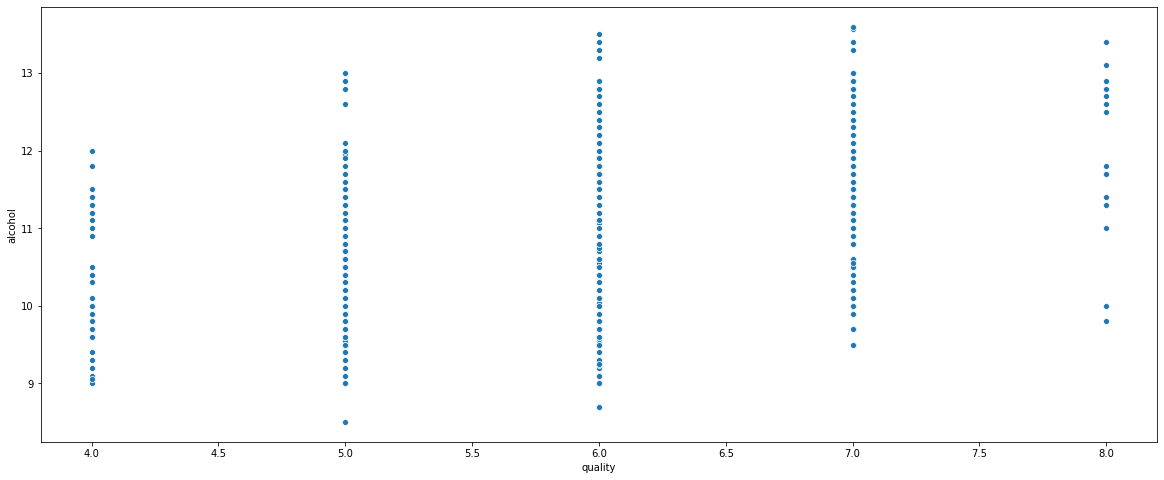

In [366]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=dataset1["quality"],y=dataset1["alcohol"])

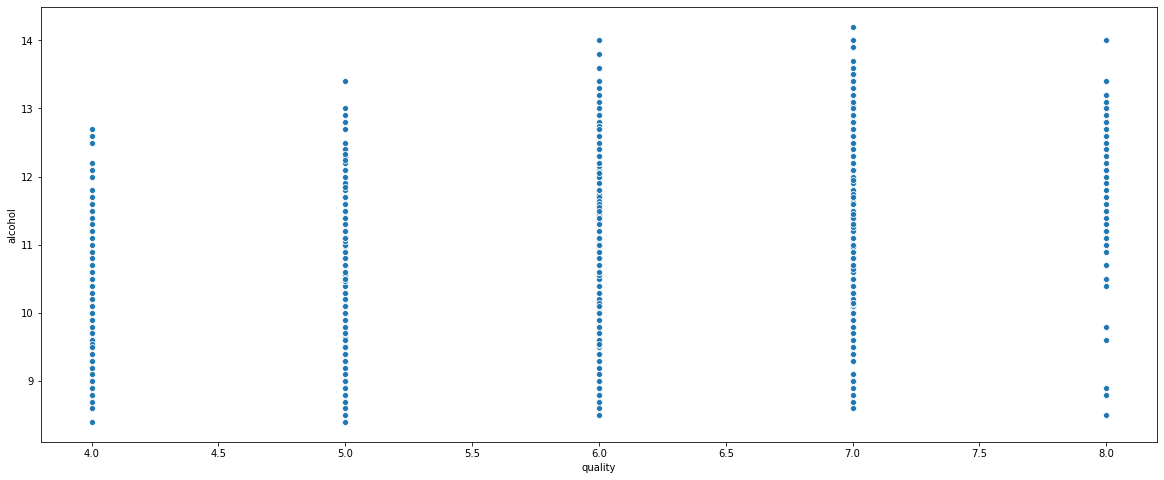

In [367]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=dataset2["quality"],y=dataset2["alcohol"])

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. alcohol')

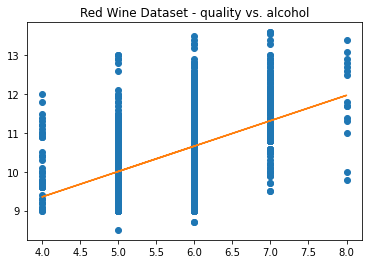

In [368]:
plt.plot(dataset1["quality"], dataset1["alcohol"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["alcohol"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. alcohol')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. alcohol')

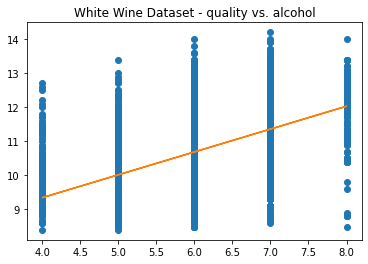

In [369]:
plt.plot(dataset2["quality"], dataset2["alcohol"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["alcohol"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. alcohol')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. sulphates')

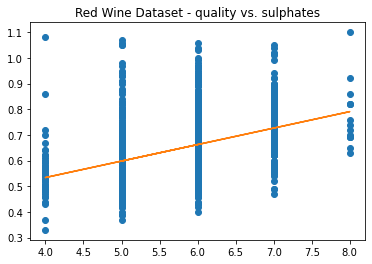

In [370]:
plt.plot(dataset1["quality"], dataset1["sulphates"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["sulphates"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. sulphates')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. sulphates')

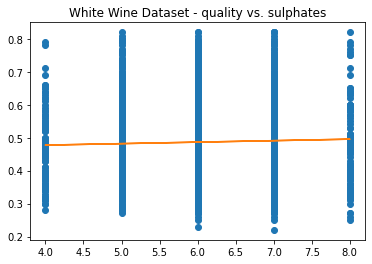

In [371]:
plt.plot(dataset2["quality"], dataset2["sulphates"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["sulphates"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. sulphates')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. pH')

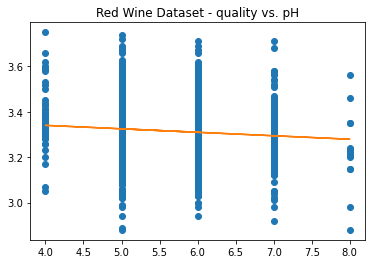

In [372]:
plt.plot(dataset1["quality"], dataset1["pH"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["pH"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. pH')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. pH')

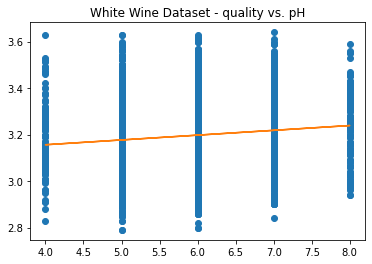

In [373]:
plt.plot(dataset2["quality"], dataset2["pH"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["pH"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. pH')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. density')

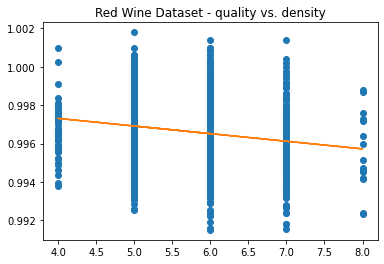

In [374]:
plt.plot(dataset1["quality"], dataset1["density"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["density"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. density')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. density')

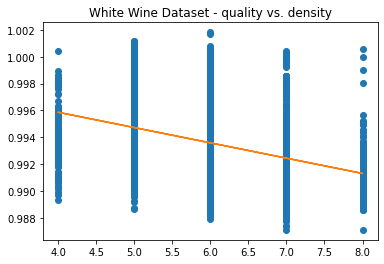

In [375]:
plt.plot(dataset2["quality"], dataset2["density"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["density"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. density')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. total sulfur dioxide')

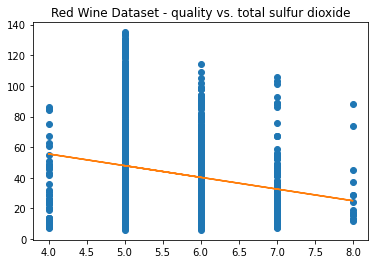

In [376]:
plt.plot(dataset1["quality"], dataset1["total sulfur dioxide"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["total sulfur dioxide"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. total sulfur dioxide')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. total sulfur dioxide')

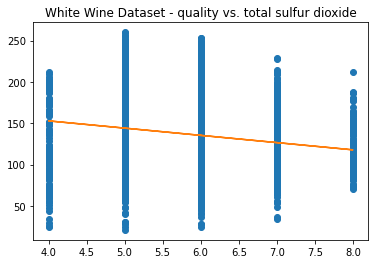

In [377]:
plt.plot(dataset2["quality"], dataset2["total sulfur dioxide"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["total sulfur dioxide"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. total sulfur dioxide')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. free sulfur dioxide')

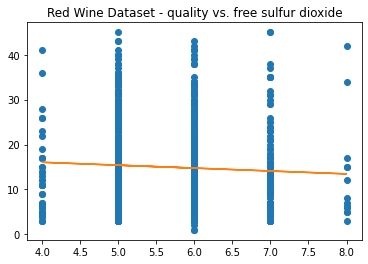

In [378]:
plt.plot(dataset1["quality"], dataset1["free sulfur dioxide"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["free sulfur dioxide"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. free sulfur dioxide')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. free sulfur dioxide')

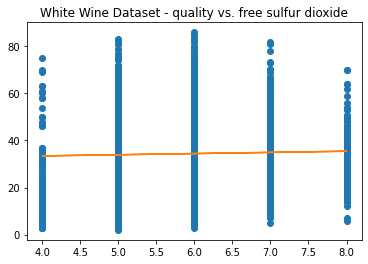

In [379]:
plt.plot(dataset2["quality"], dataset2["free sulfur dioxide"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["free sulfur dioxide"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. free sulfur dioxide')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. chlorides')

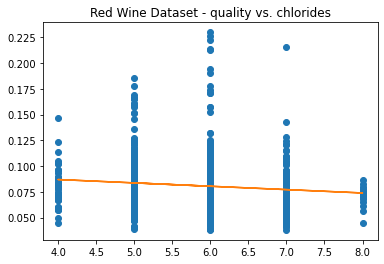

In [380]:
plt.plot(dataset1["quality"], dataset1["chlorides"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["chlorides"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. chlorides')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. chlorides')

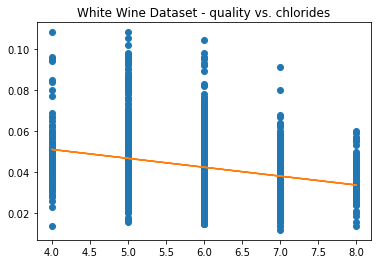

In [381]:
plt.plot(dataset2["quality"], dataset2["chlorides"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["chlorides"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. chlorides')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. residual sugar')

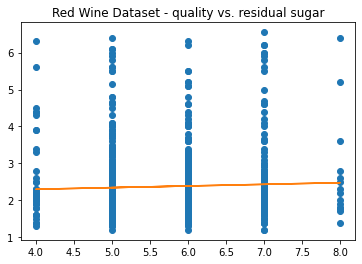

In [382]:
plt.plot(dataset1["quality"], dataset1["residual sugar"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["residual sugar"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. residual sugar')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. residual sugar')

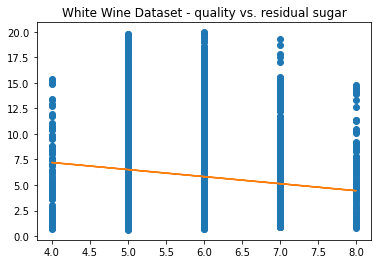

In [383]:
plt.plot(dataset2["quality"], dataset2["residual sugar"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["residual sugar"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. residual sugar')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. citric acid')

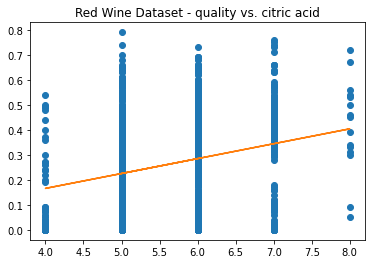

In [384]:
plt.plot(dataset1["quality"], dataset1["citric acid"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["citric acid"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. citric acid')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. citric acid')

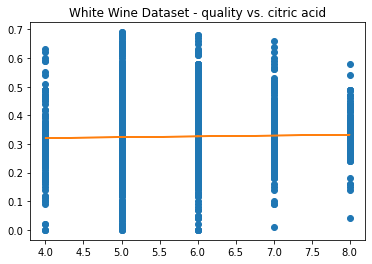

In [385]:
plt.plot(dataset2["quality"], dataset2["citric acid"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["citric acid"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. citric acid')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. volatile acidity')

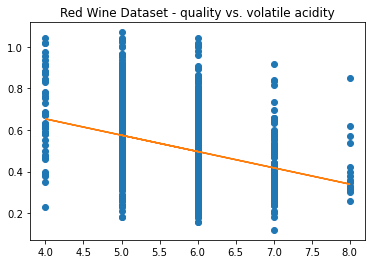

In [386]:
plt.plot(dataset1["quality"], dataset1["volatile acidity"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["volatile acidity"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. volatile acidity')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. volatile acidity')

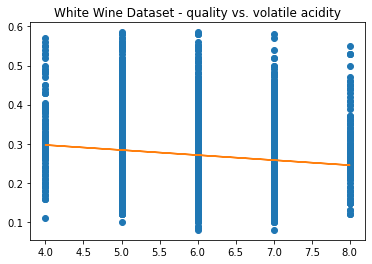

In [387]:
plt.plot(dataset2["quality"], dataset2["volatile acidity"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["volatile acidity"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. volatile acidity')

Text(0.5, 1.0, 'Red Wine Dataset - quality vs. fixed acidity')

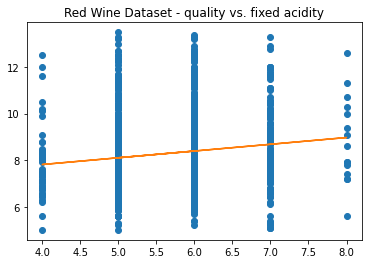

In [388]:
plt.plot(dataset1["quality"], dataset1["fixed acidity"], 'o')

m, b = np.polyfit(dataset1["quality"], dataset1["fixed acidity"], 1)
plt.plot(dataset1["quality"], m*dataset1["quality"] + b)
plt.title('Red Wine Dataset - quality vs. fixed acidity')

Text(0.5, 1.0, 'White Wine Dataset - quality vs. fixed acidity')

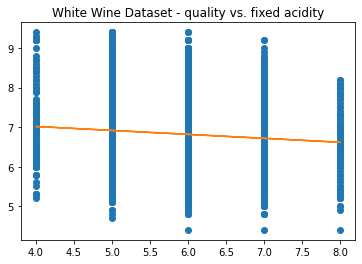

In [389]:
plt.plot(dataset2["quality"], dataset2["fixed acidity"], 'o')

m, b = np.polyfit(dataset2["quality"], dataset2["fixed acidity"], 1)
plt.plot(dataset2["quality"], m*dataset2["quality"] + b)
plt.title('White Wine Dataset - quality vs. fixed acidity')